# 1. Fragestellungen und Datenbeschaffung #

## 1.1 Impfraten bei Kindern ##

Gruppe: Léa Grandchamp, Brigit Marxer, Enea Solca

## 1.2 Fragestellungen: ##

- Wie haben sich die Durchimpfungsraten für zentrale Kinderimpfungen im Beobachtungszeitraum des Datensatzes entwickelt, und in welchen ausgewählten Ländern oder Weltregionen zeigen sich besonders starke Fortschritte bzw. Rückschritte?
- Gibt es systematische Unterschiede in der Höhe der Durchimpfungsraten zwischen verschiedenen Kinderimpfungen und haben sich diese Unterschiede im Zeitverlauf vergrössert oder verkleinert?
- Lässt sich ein Zusammenhang zwischen den Durchimpfungsraten und der Kindersterblichkeit erstellen?

## 1.3 Datenquellen: ##
- https://ourworldindata.org/grapher/global-vaccination-coverage
- https://ourworldindata.org/child-mortality

## 1.4 Daten beschaffen und laden ##

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import textwrap
try:
    import mpmath as mp
except Exception:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "mpmath"])
from IPython.display import display, Markdown
try:
    df1 = pd.read_csv("global-vaccination-coverage.csv", skiprows=1, names=["Entity","Code","Year","Share of one-year-olds who have had three doses of the hepatitis B vaccine","Share of one-year-olds vaccinated against Haemophilus influenzae type b","Share of one-year-olds who have had the one dose of the inactivated polio vaccine","Share of one-year-olds who have had one dose of the measles vaccine","Share of one-year-olds who have had the third dose of the pneumococcal conjugate vaccine","Share of one-year-olds who have had three doses of the polio vaccine","Share of one-year-olds vaccinated against rubella","Share of one-year-olds vaccinated against rotavirus","Share of one-year-olds who have had three doses of the diphtheria, tetanus and pertussis vaccine"])
    df2 = pd.read_csv("child-mortality.csv", skiprows=1, names=["Entity","Code","Year","Child mortality rate"])
    merge_df = pd.merge(df1, df2, on=['Entity', 'Year'])
    rename_df = merge_df.rename(columns={'Share of one-year-olds who have had three doses of the hepatitis B vaccine': 'Hepatitis B Vaccine Coverage','Share of one-year-olds vaccinated against Haemophilus influenzae type b': 'Hib Vaccine Coverage','Share of one-year-olds who have had the one dose of the inactivated polio vaccine': 'Inactivated Polio Vaccine Coverage','Share of one-year-olds who have had one dose of the measles vaccine': 'Measles Vaccine Coverage','Share of one-year-olds who have had the third dose of the pneumococcal conjugate vaccine': 'Pneumococcal Conjugate Vaccine Coverage','Share of one-year-olds who have had three doses of the polio vaccine': 'Polio Vaccine Coverage','Share of one-year-olds vaccinated against rubella': 'Rubella Vaccine Coverage','Share of one-year-olds vaccinated against rotavirus': 'Rotavirus Vaccine Coverage','Share of one-year-olds who have had three doses of the diphtheria, tetanus and pertussis vaccine': 'Di te per Vaccine Coverage','Child mortality rate': 'Child Mortality Rate'})
    display(Markdown("**Info:** `rename_df` created (merged CSVs). Run this top cell before others."))
except FileNotFoundError as e:
    display(Markdown(f"**Warning:** could not find CSV files: {e}"))


**Info:** `rename_df` created (merged CSVs). Run this top cell before others.

In [230]:
try:
    import scipy
except Exception:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scipy"])
    import scipy
print(scipy.__version__)

1.16.3


In [231]:
from IPython.display import display, Markdown

display(Markdown("**Tabelle 1: Die weltweiten Impfraten der einjährigen Kinder**"))

df1 = pd.read_csv("global-vaccination-coverage.csv", skiprows=1, names=["Entity","Code","Year","Share of one-year-olds who have had three doses of the hepatitis B vaccine","Share of one-year-olds vaccinated against Haemophilus influenzae type b","Share of one-year-olds who have had the one dose of the inactivated polio vaccine","Share of one-year-olds who have had one dose of the measles vaccine","Share of one-year-olds who have had the third dose of the pneumococcal conjugate vaccine","Share of one-year-olds who have had three doses of the polio vaccine","Share of one-year-olds vaccinated against rubella","Share of one-year-olds vaccinated against rotavirus","Share of one-year-olds who have had three doses of the diphtheria, tetanus and pertussis vaccine"])
                 
df1.head()

**Tabelle 1: Die weltweiten Impfraten der einjährigen Kinder**

,Entity,Code,Year,Share of one-year-olds who have had three doses of the hepatitis B vaccine,Share of one-year-olds vaccinated against Haemophilus influenzae type b,Share of one-year-olds who have had the one dose of the inactivated polio vaccine,Share of one-year-olds who have had one dose of the measles vaccine,Share of one-year-olds who have had the third dose of the pneumococcal conjugate vaccine,Share of one-year-olds who have had three doses of the polio vaccine,Share of one-year-olds vaccinated against rubella,Share of one-year-olds vaccinated against rotavirus,"Share of one-year-olds who have had three doses of the diphtheria, tetanus and pertussis vaccine"
0,Afghanistan,AFG,2007,63.0,NaN,NaN,55.0,NaN,63.0,NaN,NaN,63.0
1,Afghanistan,AFG,2008,64.0,NaN,NaN,59.0,NaN,64.0,NaN,NaN,64.0
2,Afghanistan,AFG,2009,63.0,63.0,NaN,60.0,NaN,63.0,NaN,NaN,63.0
3,Afghanistan,AFG,2010,66.0,66.0,NaN,62.0,NaN,66.0,NaN,NaN,66.0
4,Afghanistan,AFG,2011,68.0,68.0,NaN,64.0,NaN,68.0,NaN,NaN,68.0


In [232]:
display(Markdown("**Tabelle 2: Kindersterblichkeit - Der geschätzte Anteil der Neugeborenen, die vor Erreichen des fünften Lebensjahres sterben.**"))
df2 = pd.read_csv("child-mortality.csv", skiprows=1, names=["Entity","Code","Year","Child mortality rate"])
df2.head()

**Tabelle 2: Kindersterblichkeit - Der geschätzte Anteil der Neugeborenen, die vor Erreichen des fünften Lebensjahres sterben.**

,Entity,Code,Year,Child mortality rate
0,Afghanistan,AFG,1957,37.13
1,Afghanistan,AFG,1958,36.52
2,Afghanistan,AFG,1959,35.95
3,Afghanistan,AFG,1960,35.32
4,Afghanistan,AFG,1961,34.76


## 2. Daten vorbereiten
- Die Roh-Daten sind bereits im Long-Format
- Für die Analyse werden die Daten pivotiert: Jede Spalte repräsentiert eine Impfung, die Zeilen sind die verschiedenen Länder und Jahre - in aufsteigender, alphabetischer Reihenfolge. Ausserdem wurde die Spalte mit der Kindersterblichkeit hinzugefügt.

In [233]:
display(Markdown("Tabelle 3: Die Tabelle für die Auswertung mit den Impfraten und der Kindersterblichkeit."))
merge_df = pd.merge(df1, df2, on=['Entity', 'Year'])
rename_df = merge_df.rename(columns={'Share of one-year-olds who have had three doses of the hepatitis B vaccine': 'Hepatitis B Vaccine Coverage','Share of one-year-olds vaccinated against Haemophilus influenzae type b': 'Hib Vaccine Coverage','Share of one-year-olds who have had the one dose of the inactivated polio vaccine': 'Inactivated Polio Vaccine Coverage','Share of one-year-olds who have had one dose of the measles vaccine': 'Measles Vaccine Coverage','Share of one-year-olds who have had the third dose of the pneumococcal conjugate vaccine': 'Pneumococcal Conjugate Vaccine Coverage','Share of one-year-olds who have had three doses of the polio vaccine': 'Polio Vaccine Coverage','Share of one-year-olds vaccinated against rubella': 'Rubella Vaccine Coverage','Share of one-year-olds vaccinated against rotavirus': 'Rotavirus Vaccine Coverage','Share of one-year-olds who have had three doses of the diphtheria, tetanus and pertussis vaccine': 'Di te per Vaccine Coverage','Child mortality rate': 'Child Mortality Rate'})
rename_df.head()

Tabelle 3: Die Tabelle für die Auswertung mit den Impfraten und der Kindersterblichkeit.

,Entity,Code_x,Year,Hepatitis B Vaccine Coverage,Hib Vaccine Coverage,Inactivated Polio Vaccine Coverage,Measles Vaccine Coverage,Pneumococcal Conjugate Vaccine Coverage,Polio Vaccine Coverage,Rubella Vaccine Coverage,Rotavirus Vaccine Coverage,Di te per Vaccine Coverage,Code_y,Child Mortality Rate
0,Afghanistan,AFG,2007,63.0,NaN,NaN,55.0,NaN,63.0,NaN,NaN,63.0,AFG,10.07
1,Afghanistan,AFG,2008,64.0,NaN,NaN,59.0,NaN,64.0,NaN,NaN,64.0,AFG,9.63
2,Afghanistan,AFG,2009,63.0,63.0,NaN,60.0,NaN,63.0,NaN,NaN,63.0,AFG,9.22
3,Afghanistan,AFG,2010,66.0,66.0,NaN,62.0,NaN,66.0,NaN,NaN,66.0,AFG,8.83
4,Afghanistan,AFG,2011,68.0,68.0,NaN,64.0,NaN,68.0,NaN,NaN,68.0,AFG,8.46


In [234]:
print(rename_df.columns.tolist())

['Entity', 'Code_x', 'Year', 'Hepatitis B Vaccine Coverage', 'Hib Vaccine Coverage', 'Inactivated Polio Vaccine Coverage', 'Measles Vaccine Coverage', 'Pneumococcal Conjugate Vaccine Coverage', 'Polio Vaccine Coverage', 'Rubella Vaccine Coverage', 'Rotavirus Vaccine Coverage', 'Di te per Vaccine Coverage', 'Code_y', 'Child Mortality Rate']


In [235]:
display(Markdown("Tabelle 4: Für eine bessere Lesbarkeit wurde die Titelzeile vereinfacht."))
df_melted = rename_df.melt(id_vars=["Entity", "Year"],
                           value_vars=['Hepatitis B Vaccine Coverage','Hib Vaccine Coverage','Inactivated Polio Vaccine Coverage','Measles Vaccine Coverage','Pneumococcal Conjugate Vaccine Coverage','Polio Vaccine Coverage','Rubella Vaccine Coverage','Rotavirus Vaccine Coverage','Di te per Vaccine Coverage','Child Mortality Rate'],
                           var_name="Impfung",
                           value_name="Impfrate")
df_melted.head()


Tabelle 4: Für eine bessere Lesbarkeit wurde die Titelzeile vereinfacht.

,Entity,Year,Impfung,Impfrate
0,Afghanistan,2007,Hepatitis B Vaccine Coverage,63.0
1,Afghanistan,2008,Hepatitis B Vaccine Coverage,64.0
2,Afghanistan,2009,Hepatitis B Vaccine Coverage,63.0
3,Afghanistan,2010,Hepatitis B Vaccine Coverage,66.0
4,Afghanistan,2011,Hepatitis B Vaccine Coverage,68.0


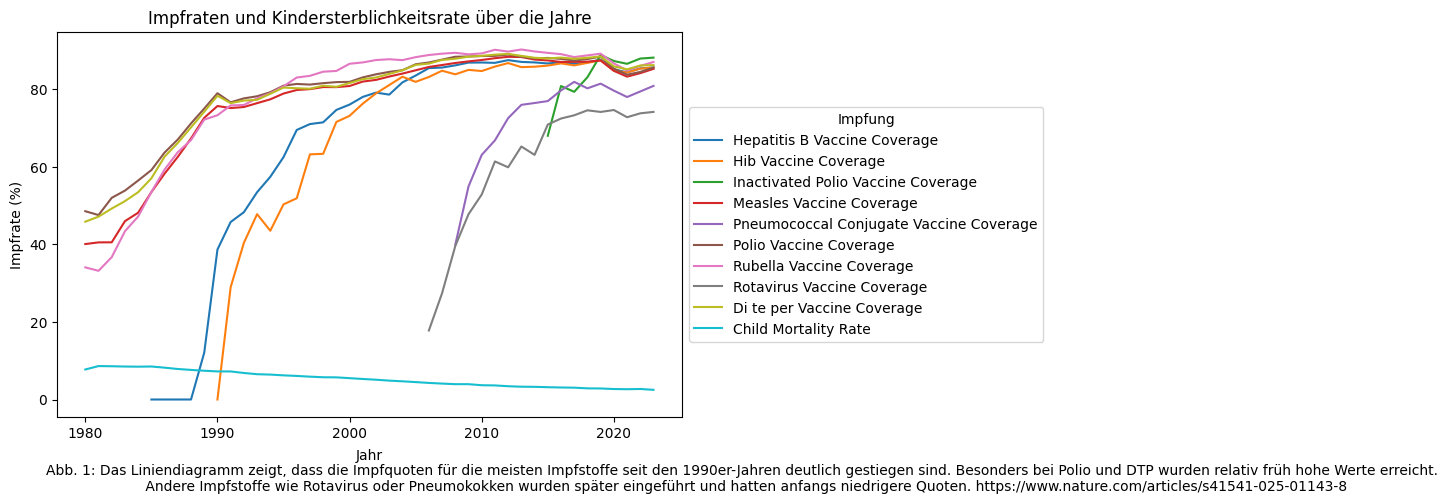

In [236]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(data=df_melted, x="Year", y="Impfrate", hue="Impfung", errorbar=None, ax=ax)

ax.legend(title="Impfung", loc="center left", bbox_to_anchor=(1, 0.5))

fig.subplots_adjust(right=0.75) 
plt.ylabel("Impfrate (%)")
plt.xlabel(None)
plt.title("Impfraten und Kindersterblichkeitsrate über die Jahre")
plt.text(0.5, -0.1, "Jahr", ha='center', va='center', transform=ax.transAxes)
plt.text(1.1, -0.2, "Abb. 1: Das Liniendiagramm zeigt, dass die Impfquoten für die meisten Impfstoffe seit den 1990er-Jahren deutlich gestiegen sind. Besonders bei Polio und DTP wurden relativ früh hohe Werte erreicht. \n Andere Impfstoffe wie Rotavirus oder Pneumokokken wurden später eingeführt und hatten anfangs niedrigere Quoten. https://www.nature.com/articles/s41541-025-01143-8", ha='center', va='bottom', transform=ax.transAxes)


plt.show()


Insgesamt sieht man in Abbildung 1, dass sich die Unterschiede zwischen den Impfstoffen mit der Zeit verringern. Das deutet darauf hin, dass Impfprogramme weltweit besser organisiert und ausgeweitet wurden.

In [237]:
display(Markdown("**Tabelle 5: Die Polio-Impfabdeckung als Pivot-Tabelle**"))
df_pivot_polio = rename_df.pivot(index='Entity', columns="Year", values= 'Polio Vaccine Coverage')
df_pivot_polio.head()

**Tabelle 5: Die Polio-Impfabdeckung als Pivot-Tabelle**

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,3.000000,5.000000,5.000000,16.000000,15.00000,11.000000,25.000000,35.000000,33.000000,...,63.00000,65.000000,66.000000,64.000000,67.00000,63.0000,61.00000,55.000000,60.000000,59.00000
Africa,10.656941,14.858231,17.513079,23.837606,28.816013,36.02056,41.261726,46.605217,50.110027,55.000828,...,73.28532,73.538574,74.914406,75.375946,76.39207,77.7159,74.14831,72.926674,72.966705,76.04714
Albania,92.000000,92.000000,92.000000,92.000000,92.000000,94.00000,94.000000,94.000000,96.000000,96.000000,...,98.00000,99.000000,98.000000,99.000000,99.00000,99.0000,98.00000,98.000000,98.000000,97.00000
Algeria,NaN,31.000000,31.000000,30.000000,30.000000,69.00000,72.000000,79.000000,85.000000,87.000000,...,95.00000,95.000000,91.000000,91.000000,91.00000,88.0000,84.00000,81.000000,77.000000,88.00000
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.00000,97.000000,98.000000,99.000000,99.00000,99.0000,99.00000,98.000000,97.000000,98.00000


In [238]:
display(Markdown("**Tabelle 6: Die Erschliessung der Polio-Impfraten nach Mittelwert, Minimum, Maximum und der Anzahl Daten.**"))
polio_jahr = rename_df.pivot_table(
    index="Year",
    values="Polio Vaccine Coverage",
    aggfunc=["mean", "min", "max", "count"]
)

polio_jahr.head()


**Tabelle 6: Die Erschliessung der Polio-Impfraten nach Mittelwert, Minimum, Maximum und der Anzahl Daten.**

,mean,min,max,count
,Polio Vaccine Coverage,Polio Vaccine Coverage,Polio Vaccine Coverage,Polio Vaccine Coverage
Year,,,,
1980,48.544530,1.0,99.0,110
1981,47.552831,1.0,99.0,131
1982,52.000342,1.0,99.0,141
1983,53.858363,1.0,99.0,151
1984,56.462605,1.0,99.0,158


In [239]:
display(Markdown("**Tabelle 7: Die Masern-Impfabdeckung als Pivot-Tabelle**"))
df_pivot_measles = rename_df.pivot(index='Entity', columns="Year", values= 'Measles Vaccine Coverage')
df_pivot_measles.head()

**Tabelle 7: Die Masern-Impfabdeckung als Pivot-Tabelle**

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,11.000000,NaN,8.000000,9.000000,14.000000,14.00000,14.000000,31.00000,34.000000,22.000000,...,60.0000,62.00000,64.00000,64.00000,66.00000,57.00000,57.00000,51.0000,56.00000,55.000000
Africa,8.786264,13.580729,16.164875,22.499367,27.352703,37.62123,43.977207,48.10331,53.313152,58.961113,...,71.3308,70.98795,71.45272,72.51367,72.62932,73.30447,71.99248,70.4967,69.96948,70.975334
Albania,90.000000,90.000000,93.000000,96.000000,96.000000,96.00000,96.000000,96.00000,96.000000,96.000000,...,98.0000,97.00000,96.00000,96.00000,94.00000,95.00000,91.00000,87.0000,86.00000,83.000000
Algeria,NaN,NaN,NaN,NaN,NaN,68.00000,67.000000,73.00000,81.000000,82.000000,...,95.0000,95.00000,94.00000,88.00000,80.00000,80.00000,80.00000,79.0000,79.00000,99.000000
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.0000,96.00000,97.00000,99.00000,99.00000,99.00000,98.00000,99.0000,98.00000,99.000000


In [240]:
display(Markdown("**Tabelle 8: Diphterie-Tetanus-Pertussis-Impfabdeckung als Pivot-Tabelle**"))
df_pivot_diteper = rename_df.pivot(index='Entity', columns="Year", values= 'Di te per Vaccine Coverage')
df_pivot_diteper.head()

**Tabelle 8: Diphterie-Tetanus-Pertussis-Impfabdeckung als Pivot-Tabelle**

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,4.000000,3.000000,5.000000,5.000000,16.00000,15.000000,11.00000,25.00000,35.000000,33.00000,...,62.00000,64.00000,66.000000,64.00000,68.00000,65.00000,61.00000,55.00000,58.00000,60.000000
Africa,9.277582,14.022753,15.809792,22.322681,28.28405,36.268597,40.47252,46.72535,50.223446,55.14232,...,73.63328,73.12944,75.721985,76.03318,77.16519,78.16262,75.56682,74.68514,74.55958,75.851456
Albania,94.000000,94.000000,95.000000,95.000000,95.00000,96.000000,96.00000,96.00000,96.000000,94.00000,...,99.00000,99.00000,99.000000,99.00000,99.00000,99.00000,98.00000,98.00000,97.00000,97.000000
Algeria,NaN,NaN,NaN,NaN,NaN,69.000000,73.00000,79.00000,85.000000,87.00000,...,95.00000,95.00000,91.000000,91.00000,91.00000,88.00000,84.00000,81.00000,77.00000,92.000000
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.00000,97.00000,98.000000,99.00000,99.00000,99.00000,99.00000,99.00000,98.00000,98.000000


In [241]:
display(Markdown("**Tabelle 9: Die Polio-Impfabdeckung als Pivot-Tabelle**"))
polio = rename_df[["Entity", "Year", "Polio Vaccine Coverage"]].copy()
polio = polio.rename(columns={"Polio Vaccine Coverage": "Rate"})
polio["Impfung"] = "Polio"

measles = rename_df[["Entity", "Year", "Measles Vaccine Coverage"]].copy()
measles = measles.rename(columns={"Measles Vaccine Coverage": "Rate"})
measles["Impfung"] = "Masern"

diteper = rename_df[["Entity", "Year", "Di te per Vaccine Coverage"]].copy()
diteper = diteper.rename(columns={"Di te per Vaccine Coverage": "Rate"})
diteper["Impfung"] = "DiTePer"

# 2. Mit concat untereinander kleben
df_concat = pd.concat([polio, measles, diteper], axis=0, ignore_index=True)

df_concat.head()


**Tabelle 9: Die Polio-Impfabdeckung als Pivot-Tabelle**

,Entity,Year,Rate,Impfung
0,Afghanistan,2007,63.0,Polio
1,Afghanistan,2008,64.0,Polio
2,Afghanistan,2009,63.0,Polio
3,Afghanistan,2010,66.0,Polio
4,Afghanistan,2011,68.0,Polio


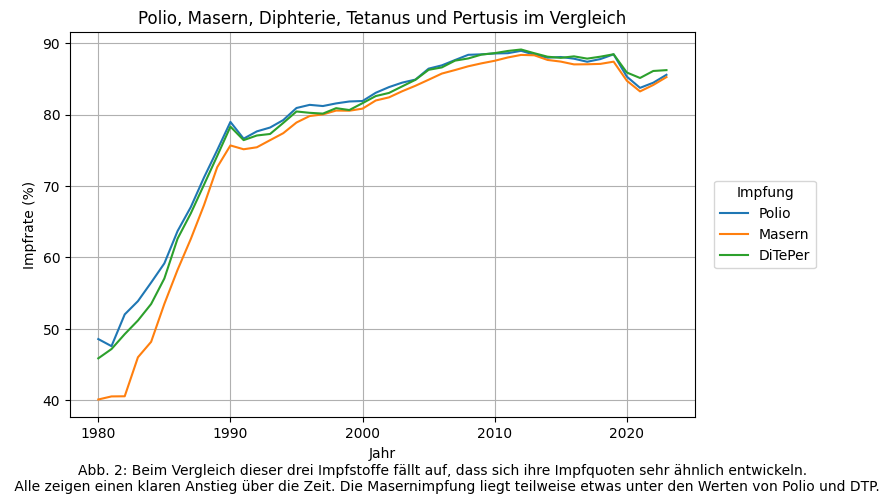

In [242]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(data=df_concat, x="Year", y="Rate", hue="Impfung",errorbar=None, ax=ax) 
ax.legend(title="Impfung", loc="center left", bbox_to_anchor=(1.02, 0.5))
fig.subplots_adjust(right=0.75)
plt.title("Polio, Masern, Diphterie, Tetanus und Pertusis im Vergleich")
plt.xlabel("Jahr")
plt.ylabel("Impfrate (%)")
plt.grid(True)
plt.text(0.6, -0.2, "Abb. 2: Beim Vergleich dieser drei Impfstoffe fällt auf, dass sich ihre Impfquoten sehr ähnlich entwickeln. \n Alle zeigen einen klaren Anstieg über die Zeit. Die Masernimpfung liegt teilweise etwas unter den Werten von Polio und DTP.", ha='center', va='bottom', transform=ax.transAxes)
plt.show()


In [243]:
display(Markdown("**Tabelle 10: Die Kindersterblichkeitsrate als Pivot-Tabelle**"))
df_pivot_mort = rename_df.pivot(index='Entity', columns="Year", values= 'Child Mortality Rate')
df_pivot_mort.head()

**Tabelle 10: Die Kindersterblichkeitsrate als Pivot-Tabelle**

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,24.57,23.94,27.99,27.44,30.91,30.09,25.31,24.72,21.84,18.71,...,7.51,7.24,7.00,6.76,6.54,6.33,6.13,5.93,5.74,5.55
Africa,18.78,18.30,17.89,18.27,17.86,17.45,16.98,16.18,16.24,15.64,...,7.68,7.49,7.31,7.17,6.83,6.66,6.43,6.27,6.22,5.91
Albania,8.12,7.49,6.90,6.37,5.90,5.48,5.11,4.79,4.51,4.28,...,0.99,0.96,0.94,0.93,0.93,0.94,0.94,0.95,0.94,0.94
Algeria,NaN,14.03,12.31,10.52,8.91,7.61,6.63,5.96,5.55,5.30,...,2.54,2.49,2.45,2.40,2.37,2.33,2.29,2.26,2.23,2.20
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.37,0.35,0.34,0.32,0.31,0.30,0.29,0.28,0.27,0.26


## 3. Statistik der Roh-Daten (Analyse im Long-Format)

Über die einzelnen Spalten kann folgendes ausgesagt werden:

- Die Spalte Länder enthält 205 verschieden Länder.
- Die Spalte Codes enthält 196 verschiedene Codes.
- Es sind Daten zwischen 1980 und 2023 vorhanden. 
- Ab dem Jahr 2011 sind die Daten komplett.
- Die Impfraten bewegen sich zwischen 32.32% und 98.94%.
- Monaco ist das Land mit der durchschnittlich höchsten Impfrate bei Polio.
- Chad ist das Land mit der durchschnittlich tiefsten Impfrate bei Polio.
- Grenada liegt bei der durchschnittlichen Impfrate von Polio an nächsten beim Median.


In [244]:
print(rename_df.dtypes)


Entity                                      object
Code_x                                      object
Year                                         int64
Hepatitis B Vaccine Coverage               float64
Hib Vaccine Coverage                       float64
Inactivated Polio Vaccine Coverage         float64
Measles Vaccine Coverage                   float64
Pneumococcal Conjugate Vaccine Coverage    float64
Polio Vaccine Coverage                     float64
Rubella Vaccine Coverage                   float64
Rotavirus Vaccine Coverage                 float64
Di te per Vaccine Coverage                 float64
Code_y                                      object
Child Mortality Rate                       float64
dtype: object


In [245]:
print(df_melted)

            Entity  Year                       Impfung  Impfrate
0      Afghanistan  2007  Hepatitis B Vaccine Coverage     63.00
1      Afghanistan  2008  Hepatitis B Vaccine Coverage     64.00
2      Afghanistan  2009  Hepatitis B Vaccine Coverage     63.00
3      Afghanistan  2010  Hepatitis B Vaccine Coverage     66.00
4      Afghanistan  2011  Hepatitis B Vaccine Coverage     68.00
...            ...   ...                           ...       ...
84115     Zimbabwe  1990          Child Mortality Rate      7.97
84116     Zimbabwe  1991          Child Mortality Rate      8.33
84117     Zimbabwe  1992          Child Mortality Rate      8.73
84118     Zimbabwe  1993          Child Mortality Rate      9.16
84119     Zimbabwe  1994          Child Mortality Rate      9.52

[84120 rows x 4 columns]


### 3.1 Analyse Länder

In [246]:
print('Anzahl verschiedener Länder: ', len(rename_df['Entity'].unique()))

Anzahl verschiedener Länder:  205


In [247]:
rename_df['Entity'].value_counts()

Entity
Afghanistan            44
Africa                 44
Albania                44
Argentina              44
Antigua and Barbuda    44
                       ..
Sierra Leone           25
Liberia                25
East Timor             22
Montenegro             18
South Sudan            13
Name: count, Length: 205, dtype: int64

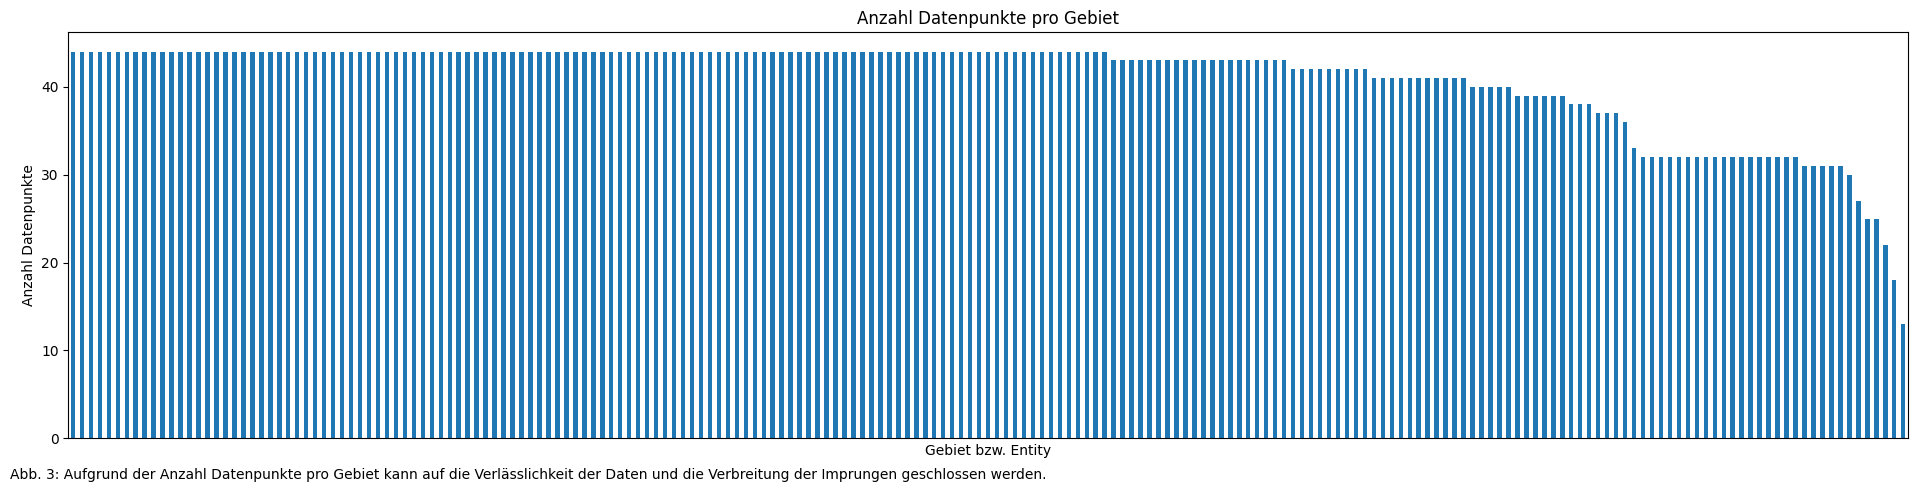

In [248]:
rename_df["Entity"].value_counts().plot(kind='bar', 
                                 xticks=[],
                                 ylabel='Anzahl Datenpunkte',
                                 xlabel='Gebiet bzw. Entity',
                                 title='Anzahl Datenpunkte pro Gebiet',
                                 figsize=(20, 5))
plt.text(0.25, -0.1, "Abb. 3: Aufgrund der Anzahl Datenpunkte pro Gebiet kann auf die Verlässlichkeit der Daten und die Verbreitung der Imprungen geschlossen werden.", ha='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

In [249]:
mittelwerte = (
    rename_df.groupby("Entity")["Polio Vaccine Coverage"]
    .mean()
)

print(mittelwerte)


Entity
Afghanistan    40.860465
Africa         58.748267
Albania        96.454545
Algeria        82.488372
Andorra        96.962963
                 ...    
Vietnam        82.463415
World          71.159091
Yemen          52.318182
Zambia         82.048780
Zimbabwe       80.302326
Name: Polio Vaccine Coverage, Length: 205, dtype: float64


In [ ]:
Entity_max = mittelwerte.idxmax()
Entity_min = mittelwerte.idxmin()

print("Land mit höchster durchschnittlicher Impfrate:", Entity_max)
print("Land mit tiefster durchschnittlicher Impfrate:", Entity_min)

medianwert = mittelwerte.median()
print("Medianwert:", medianwert)

abweichung = (mittelwerte - medianwert).abs()

land_median = abweichung.idxmin()

print("Land nahe am Medianwert:", land_median)



Land mit höchster durchschnittlicher Impfrate: Monaco
Land mit tiefster durchschnittlicher Impfrate: Chad
Medianwert: 85.25
Land nahe am Medianwert: Grenada


In [ ]:
rangliste = mittelwerte.sort_values(ascending=False)

anzahl = len(rangliste)
print(rangliste.head(12))



Entity
Monaco          98.944444
Hungary         98.863636
Sweden          98.159091
Slovakia        97.900000
Czechia         97.096774
Palestine       97.096774
Cuba            97.000000
Andorra         96.962963
Albania         96.454545
Belgium         96.431818
Turkmenistan    96.343750
Netherlands     96.318182
Name: Polio Vaccine Coverage, dtype: float64


Die Niederlande ist ein Land auf dem oberen Teil der Liste mit ca. 18 Mio. Einwohnern.

In [ ]:
rangliste = mittelwerte.sort_values(ascending=True)

anzahl = len(rangliste)
print(rangliste.head(12))

Entity
Chad                            32.325000
Somalia                         35.571429
Angola                          36.051282
Central African Republic        40.636364
Afghanistan                     40.860465
Nigeria                         42.700000
Niger                           43.790698
Haiti                           44.954545
Guinea                          45.119048
Democratic Republic of Congo    45.750000
Ethiopia                        47.863636
Papua New Guinea                50.340909
Name: Polio Vaccine Coverage, dtype: float64


Der Chad ist das Land mit der schlechtesten Polio Impfrate mit ca. 20 Mio. Einwohnern.

In [ ]:
# mittelwerte: Series mit Index = Land (Entity), Wert = durchschnittliche Impfrate des Landes

# 1. Median der durchschnittlichen Impfraten (allgemeiner Median)
medianwert = mittelwerte.median()
print("Median der allgemeinen durchschnittlichen Impfrate:", medianwert)

# 2. Abweichung jedes Landes von diesem Median (Betrag)
abweichung = (mittelwerte - medianwert).abs()

# 3. 20 Länder mit der kleinsten Abweichung
nahe_20 = abweichung.nsmallest(20)

# 4. Als Tabelle mit Land, Impfrate und Abweichung
tabelle_nahe_20 = pd.DataFrame({
    "Land": nahe_20.index,
    "durchschnittliche_Impfrate": mittelwerte.loc[nahe_20.index],
    "Abweichung_zum_Median": nahe_20.values
}).sort_values("Abweichung_zum_Median")

print(tabelle_nahe_20.to_string(index=False))


Median der allgemeinen durchschnittlichen Impfrate: 85.25
                Land  durchschnittliche_Impfrate  Abweichung_zum_Median
             Grenada                   85.250000               0.000000
 Trinidad and Tobago                   85.295455               0.045455
             Georgia                   85.468750               0.218750
              Tuvalu                   85.522727               0.272727
       North America                   85.548388               0.298388
              Guyana                   84.818182               0.431818
             Jamaica                   85.795455               0.545455
            Portugal                   84.659091               0.590909
United Arab Emirates                   85.954545               0.704545
            Honduras                   84.454545               0.795455
             Bahamas                   86.068182               0.818182
              Belize                   84.340909               0.909091
      

Australien ist ein Land, dass nahe am Median liegt mit ca. 26 Mio. Einwohnern.

In [ ]:
impf_cols = [col for col in rename_df.columns if "Coverage" in col]

# Mittelwert aller Impfungen pro Jahr und Land
rename_df["Impfungen Durchschnitt"] = rename_df[impf_cols].mean(axis=1)


In [255]:
# Länder gezielt filtern
laender = [ 'Netherlands', 'Chad', 'Australia']
monaco = ["Monaco"]
df_filtered = rename_df[rename_df['Entity'].isin(laender)]

<Figure size 1200x600 with 0 Axes>

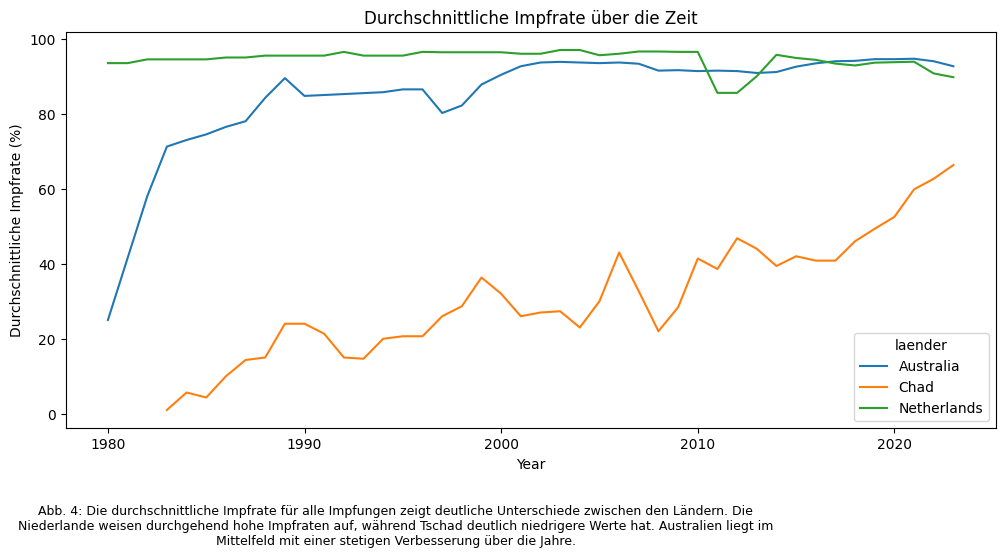

In [288]:
df_avg = rename_df[rename_df['Entity'].isin(laender)].copy()
df_avg['laender'] = df_avg['Entity']

plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=df_avg, x="Year", y="Impfungen Durchschnitt", hue="laender", ax=ax)

ax.set_title("Durchschnittliche Impfrate über die Zeit")
ax.set_ylabel("Durchschnittliche Impfrate (%)")

caption = "Abb. 4: Die durchschnittliche Impfrate für alle Impfungen zeigt deutliche Unterschiede zwischen den Ländern. Die Niederlande weisen durchgehend hohe Impfraten auf, während Tschad deutlich niedrigere Werte hat. Australien liegt im Mittelfeld mit einer stetigen Verbesserung über die Jahre."

fig.subplots_adjust(bottom=0.22)

fig.text(
    0.4, 0.02,
    textwrap.fill(caption, 120),
    ha="center", va="bottom", fontsize=9
)

plt.show()


### 3.2 Analyse Codes

In [289]:
print('Anzahl verschiedener Codes:', len(rename_df['Code_x'].unique()))

Anzahl verschiedener Codes: 196


In [258]:
# Anzahl Datenpunkte pro Land
rename_df['Code_x'].value_counts()

Code_x
AFG    44
ALB    44
ARG    44
DEU    44
ATG    44
       ..
SLE    25
LBR    25
TLS    22
MNE    18
SSD    13
Name: count, Length: 195, dtype: int64

Text(0.001, -0.1, 'Abb. 5: Nachweis der Datenpunkte')

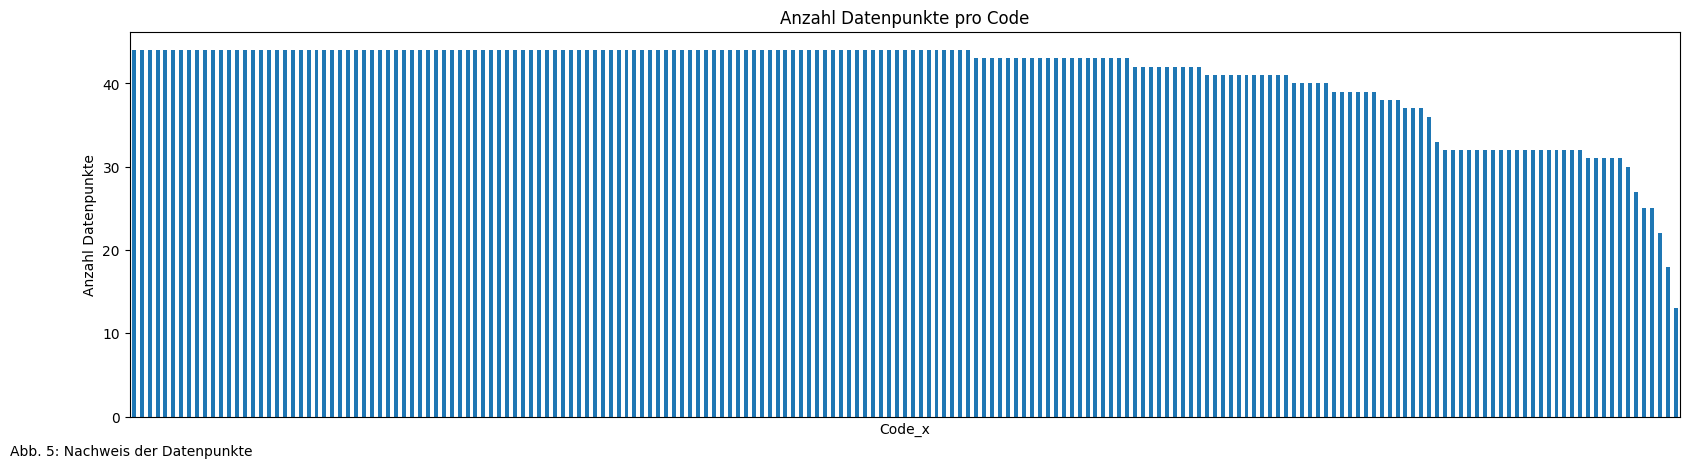

In [259]:
rename_df['Code_x'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code', figsize=(20,5));
plt.text(0.001, -0.1, "Abb. 5: Nachweis der Datenpunkte", ha='center', transform=plt.gca().transAxes)

### 3.3 Analyse Jahr

In [260]:
print('Anzahl verschiedener Jahre: ', len(rename_df['Year'].unique()))

Anzahl verschiedener Jahre:  44


In [290]:
# Anzahl Datenpunkte pro Jahr
rename_df['Year'].value_counts().sort_index()

Year
1980    116
1981    136
1982    145
1983    156
1984    161
1985    167
1986    170
1987    173
1988    174
1989    174
1990    174
1991    175
1992    193
1993    198
1994    199
1995    199
1996    199
1997    200
1998    200
1999    202
2000    202
2001    202
2002    203
2003    203
2004    203
2005    203
2006    204
2007    204
2008    204
2009    204
2010    204
2011    205
2012    205
2013    205
2014    205
2015    205
2016    205
2017    205
2018    205
2019    205
2020    205
2021    205
2022    205
2023    205
Name: count, dtype: int64

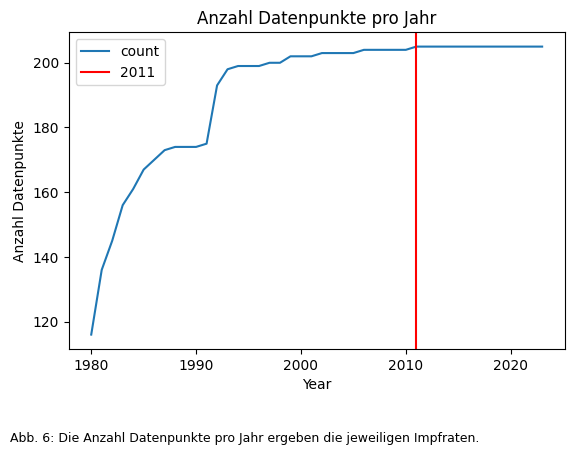

In [292]:
g = (rename_df["Year"].value_counts()
     .sort_index()
     .plot(ylabel="Anzahl Datenpunkte", title="Anzahl Datenpunkte pro Jahr"))

g.axvline(x=2011, color="red", label="2011")
g.legend()

caption = "Abb. 6: Die Anzahl Datenpunkte pro Jahr ergeben die jeweiligen Impfraten." 

fig = g.figure
fig.subplots_adjust(bottom=0.22)
fig.text(0.4, 0.02, textwrap.fill(caption, 110),
         ha="center", va="bottom", fontsize=9)

plt.show()


Die Anzahl Datenpunkte in Abbildung 6 sind abhängig von den Krankheiten, gegen die geimpft wurde, und den jeweiligen Ländern, in denen diese Imfpung angewendet wurde. In den frühen Jahren fehlen noch viele Daten, besonders in den 1980er-Jahren. Ab 2011 sind Daten für alle 205 analysierten Länder bzw. Gebiete verfügbar. Die neueren Daten sind daher besser geeignet für Auswertungen. Da Impfungen ein gesundheitliches Risiko darstellen, werden jeweils die Inzidenz (Neuerkrankungen in einem Zeitraum), Prävalenz (Anteil der aktuell Kranken) und die Risikofaktoren für ein bestimmtes Gebiet berücksichtigt.
https://www.infovac.ch/de/impfungen/impfstoffe-nach-krankheiten-geordnet
https://www.infovac.ch/de/impfungen/schweizerischer-impfplan

### 3.4 Analyse Durchimpfungsrate

In [263]:
display(Markdown("Tabelle 11: Die erfassten Jahre, die Raten der jeweiligen Impfungen und der Kindersterblichkeit sowie die mittlere Impfrate über alle Gebiete und Impfungen werden ausgewiesen." ))
rename_df.describe()

Tabelle 11: Die erfassten Jahre, die Raten der jeweiligen Impfungen und der Kindersterblichkeit sowie die mittlere Impfrate über alle Gebiete und Impfungen werden ausgewiesen.

,Year,Hepatitis B Vaccine Coverage,Hib Vaccine Coverage,Inactivated Polio Vaccine Coverage,Measles Vaccine Coverage,Pneumococcal Conjugate Vaccine Coverage,Polio Vaccine Coverage,Rubella Vaccine Coverage,Rotavirus Vaccine Coverage,Di te per Vaccine Coverage,Child Mortality Rate,Impfungen Durchschnitt
count,8412.000000,4929.000000,4111.000000,1728.000000,8261.000000,1875.000000,8388.000000,4714.000000,1341.000000,8384.000000,8412.000000,8412.000000
mean,2002.638968,82.059012,83.069218,83.984932,78.609822,77.051267,80.180549,84.502788,69.246996,79.772187,5.149359,77.178608
std,12.308061,21.579231,20.967083,20.513621,21.565537,23.758945,21.746525,22.007045,26.716173,21.799680,5.590848,21.829849
min,1980.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.140000,1.000000
25%,1992.000000,77.000000,78.417250,77.000000,68.000000,68.000000,72.000000,83.000000,55.000000,71.988934,1.217500,66.500000
50%,2003.000000,91.000000,91.000000,93.000000,87.000000,86.000000,89.000000,93.000000,79.000000,88.000000,2.810000,85.000000
75%,2013.000000,96.000000,96.000000,98.000000,95.000000,94.000000,96.000000,97.000000,90.000000,96.000000,7.280000,94.000000
max,2023.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,47.890000,99.000000


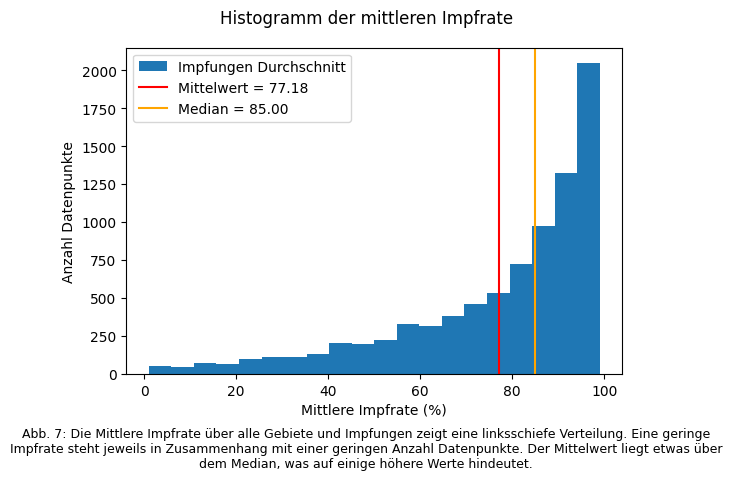

In [294]:
ax = rename_df["Impfungen Durchschnitt"].plot(kind="hist", bins=20)

caption = "Abb. 7: Die Mittlere Impfrate über alle Gebiete und Impfungen zeigt eine linksschiefe Verteilung. Eine geringe Impfrate steht jeweils in Zusammenhang mit einer geringen Anzahl Datenpunkte. Der Mittelwert liegt etwas über dem Median, was auf einige höhere Werte hindeutet."
fig = ax.figure
fig.suptitle("Histogramm der mittleren Impfrate", y=0.98)
fig.subplots_adjust(top=0.9, bottom=0.22)
ax.set_xlabel("Mittlere Impfrate (%)")
ax.set_ylabel("Anzahl Datenpunkte")

mean = rename_df["Impfungen Durchschnitt"].mean()
median = rename_df["Impfungen Durchschnitt"].median()

ax.axvline(mean, color="red", label=f"Mittelwert = {mean:.2f}")
ax.axvline(median, color="orange", label=f"Median = {median:.2f}")
ax.legend()

fig.subplots_adjust(bottom=0.22)
fig.text(
    0.5, 0.02,
    textwrap.fill(caption, 110),
    ha="center", va="bottom",
    fontsize=9
)

plt.show()



### 3.5 Analyse Polio Impfung

In [265]:
print("Statistische Kennzahlen für die Polio-Impfabdeckung:")
print(f"Mittelwert: {rename_df['Polio Vaccine Coverage'].mean():.2f}")
print(f"Median: {rename_df['Polio Vaccine Coverage'].median():.2f}")
print(f"Standardabweichung: {rename_df['Polio Vaccine Coverage'].std():.2f}")
print(f"5% Perzentil: {rename_df['Polio Vaccine Coverage'].quantile(0.05):.2f}")
print(f"99.9% Perzentil: {rename_df['Polio Vaccine Coverage'].quantile(0.999):.2f}")
print(f"Minimum: {rename_df['Polio Vaccine Coverage'].min():.2f}")
print(f"Maximum: {rename_df['Polio Vaccine Coverage'].max():.2f}")


Statistische Kennzahlen für die Polio-Impfabdeckung:
Mittelwert: 80.18
Median: 89.00
Standardabweichung: 21.75
5% Perzentil: 30.00
99.9% Perzentil: 99.00
Minimum: 0.00
Maximum: 99.00


In [266]:
display(Markdown("**Tabelle 12: Aufbereitung der Werte für die Auswertung der Polio-Impfrate.**"))
rename_df.sort_values(by='Polio Vaccine Coverage', ascending=False).head(10)

**Tabelle 12: Aufbereitung der Werte für die Auswertung der Polio-Impfrate.**

,Entity,Code_x,Year,Hepatitis B Vaccine Coverage,Hib Vaccine Coverage,Inactivated Polio Vaccine Coverage,Measles Vaccine Coverage,Pneumococcal Conjugate Vaccine Coverage,Polio Vaccine Coverage,Rubella Vaccine Coverage,Rotavirus Vaccine Coverage,Di te per Vaccine Coverage,Code_y,Child Mortality Rate,Impfungen Durchschnitt
6355,Saint Lucia,LCA,2014,99.0,99.0,NaN,99.0,NaN,99.0,99.0,NaN,99.0,LCA,1.75,99.00
6327,Saint Kitts and Nevis,KNA,1986,NaN,NaN,NaN,96.0,NaN,99.0,NaN,NaN,99.0,KNA,3.56,98.00
6354,Saint Lucia,LCA,2013,99.0,99.0,NaN,99.0,NaN,99.0,99.0,NaN,99.0,LCA,1.77,99.00
6330,Saint Kitts and Nevis,KNA,1989,NaN,NaN,NaN,90.0,NaN,99.0,90.0,NaN,99.0,KNA,3.12,94.50
6331,Saint Kitts and Nevis,KNA,1990,NaN,NaN,NaN,99.0,NaN,99.0,99.0,NaN,99.0,KNA,3.03,99.00
6332,Saint Kitts and Nevis,KNA,1991,NaN,NaN,NaN,99.0,NaN,99.0,99.0,NaN,99.0,KNA,2.96,99.00
6333,Saint Kitts and Nevis,KNA,1992,NaN,NaN,NaN,99.0,NaN,99.0,99.0,NaN,99.0,KNA,2.90,99.00
1538,China,CHN,2009,99.0,NaN,NaN,99.0,NaN,99.0,NaN,NaN,99.0,CHN,1.71,99.00
1537,China,CHN,2008,95.0,NaN,NaN,97.0,NaN,99.0,NaN,NaN,97.0,CHN,1.85,97.00
1367,Cape Verde,CPV,2010,98.0,NaN,NaN,97.0,NaN,99.0,NaN,NaN,99.0,CPV,2.67,98.25


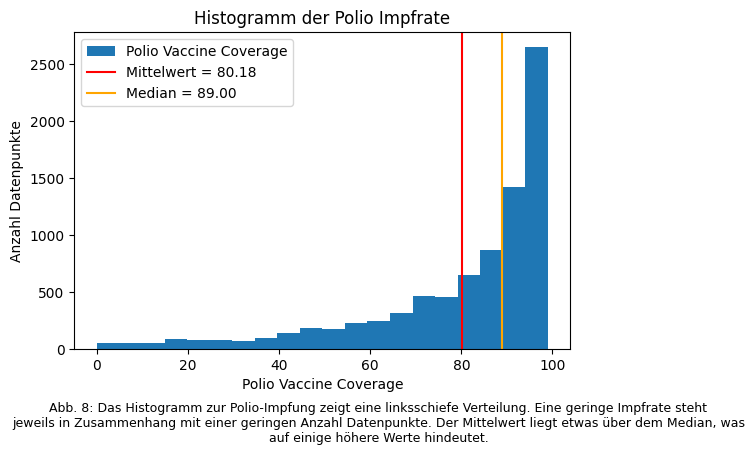

In [295]:
g = rename_df["Polio Vaccine Coverage"].plot(
    kind="hist", bins=20, title="Histogramm der Polio Impfrate",
    xlabel="Polio Vaccine Coverage", ylabel="Anzahl Datenpunkte"
)

mean = rename_df["Polio Vaccine Coverage"].mean()
median = rename_df["Polio Vaccine Coverage"].median()

g.axvline(mean, color="red", label=f"Mittelwert = {mean:.2f}")
g.axvline(median, color="orange", label=f"Median = {median:.2f}")
g.legend()

caption = (
    "Abb. 8: Das Histogramm zur Polio-Impfung zeigt eine linksschiefe Verteilung. Eine geringe Impfrate steht jeweils in Zusammenhang mit einer geringen Anzahl Datenpunkte. Der Mittelwert liegt etwas über dem Median, was auf einige höhere Werte hindeutet."
)

fig = g.figure
fig.subplots_adjust(bottom=0.22)  # mehr Platz unten
fig.text(0.6, 0.02, textwrap.fill(caption, 110),
         ha="center", va="bottom", fontsize=9)

plt.show()


Das Histogramm in Abbildung 8 zur Polio-Impfung zeigt, dass viele Länder eine sehr hohe Impfquote haben, während einige wenige Länder deutlich niedrigere Werte aufweisen. Die grosse Anzahl an Datenpunkten bei den Ländern mit einer hohen Impfquote lässt auch darauf schliessen, dass in diesen Ländern auch schon über einen längeren Zeitraum geimpft wurde.
https://www.unicef.de/informieren/aktuelles/blog/-/alle-fragen-und-antworten-zum-thema-polio/315008 

### 3.6 Analyse Kindersterblichkeit

In [268]:
print(f"Mittelwert: {rename_df['Child Mortality Rate'].mean():.2f}")
print(f"Median: {rename_df['Child Mortality Rate'].median():.2f}")
print(f"Standardabweichung: {rename_df['Child Mortality Rate'].std():.2f}")
print(f"5% Perzentil: {rename_df['Child Mortality Rate'].quantile(0.05):.2f}")
print(f"99.9% Perzentil: {rename_df['Child Mortality Rate'].quantile(0.999):.2f}")


Mittelwert: 5.15
Median: 2.81
Standardabweichung: 5.59
5% Perzentil: 0.40
99.9% Perzentil: 33.86


In [269]:
display(Markdown("**Tabelle 13: Die Datentabelle für die weitere Analyse der Kindersterblichkeit**"))
rename_df.describe()

**Tabelle 13: Die Datentabelle für die weitere Analyse der Kindersterblichkeit**

,Year,Hepatitis B Vaccine Coverage,Hib Vaccine Coverage,Inactivated Polio Vaccine Coverage,Measles Vaccine Coverage,Pneumococcal Conjugate Vaccine Coverage,Polio Vaccine Coverage,Rubella Vaccine Coverage,Rotavirus Vaccine Coverage,Di te per Vaccine Coverage,Child Mortality Rate,Impfungen Durchschnitt
count,8412.000000,4929.000000,4111.000000,1728.000000,8261.000000,1875.000000,8388.000000,4714.000000,1341.000000,8384.000000,8412.000000,8412.000000
mean,2002.638968,82.059012,83.069218,83.984932,78.609822,77.051267,80.180549,84.502788,69.246996,79.772187,5.149359,77.178608
std,12.308061,21.579231,20.967083,20.513621,21.565537,23.758945,21.746525,22.007045,26.716173,21.799680,5.590848,21.829849
min,1980.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.140000,1.000000
25%,1992.000000,77.000000,78.417250,77.000000,68.000000,68.000000,72.000000,83.000000,55.000000,71.988934,1.217500,66.500000
50%,2003.000000,91.000000,91.000000,93.000000,87.000000,86.000000,89.000000,93.000000,79.000000,88.000000,2.810000,85.000000
75%,2013.000000,96.000000,96.000000,98.000000,95.000000,94.000000,96.000000,97.000000,90.000000,96.000000,7.280000,94.000000
max,2023.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,47.890000,99.000000


In [270]:
display(Markdown("**Tabelle 14: Die angeordneten Werte für die Analyse der Kindersterblichkeit.**"))
rename_df.sort_values(by='Child Mortality Rate', ascending=False).head(10)

**Tabelle 14: Die angeordneten Werte für die Analyse der Kindersterblichkeit.**

,Entity,Code_x,Year,Hepatitis B Vaccine Coverage,Hib Vaccine Coverage,Inactivated Polio Vaccine Coverage,Measles Vaccine Coverage,Pneumococcal Conjugate Vaccine Coverage,Polio Vaccine Coverage,Rubella Vaccine Coverage,Rotavirus Vaccine Coverage,Di te per Vaccine Coverage,Code_y,Child Mortality Rate,Impfungen Durchschnitt
1400,Central African Republic,CAF,2009,42.0,42.0,NaN,56.0,NaN,45.0,NaN,NaN,42.0,CAF,47.89,45.400000
6910,Somalia,SOM,1992,NaN,NaN,NaN,32.0,NaN,20.0,NaN,NaN,21.0,SOM,45.60,24.333333
6909,Somalia,SOM,1991,NaN,NaN,NaN,30.0,NaN,18.0,NaN,NaN,20.0,SOM,44.29,22.666667
6291,Rwanda,RWA,1994,NaN,NaN,NaN,25.0,NaN,23.0,NaN,NaN,23.0,RWA,38.90,23.666667
1413,Central African Republic,CAF,2022,33.0,33.0,33.0,32.0,32.0,35.0,NaN,NaN,33.0,CAF,38.74,33.000000
6929,Somalia,SOM,2011,NaN,NaN,NaN,46.0,NaN,49.0,NaN,NaN,41.0,SOM,35.85,45.333333
5364,Niger,NER,1987,NaN,NaN,NaN,27.0,NaN,7.0,NaN,NaN,7.0,NER,34.09,13.666667
5363,Niger,NER,1986,NaN,NaN,NaN,27.0,NaN,5.0,NaN,NaN,5.0,NER,33.99,12.333333
5365,Niger,NER,1988,NaN,NaN,NaN,24.0,NaN,9.0,NaN,NaN,9.0,NER,33.98,14.000000
5362,Niger,NER,1985,NaN,NaN,NaN,27.0,NaN,4.0,NaN,NaN,4.0,NER,33.70,11.666667


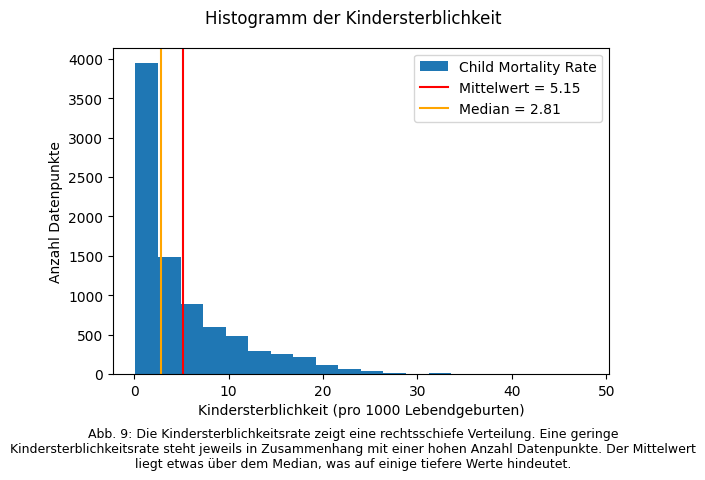

In [296]:
ax = rename_df["Child Mortality Rate"].plot(kind="hist", bins=20)

caption = "Abb. 9: Die Kindersterblichkeitsrate zeigt eine rechtsschiefe Verteilung. Eine geringe Kindersterblichkeitsrate steht jeweils in Zusammenhang mit einer hohen Anzahl Datenpunkte. Der Mittelwert liegt etwas über dem Median, was auf einige tiefere Werte hindeutet."

fig = ax.figure
fig.suptitle("Histogramm der Kindersterblichkeit", y=0.98)
fig.subplots_adjust(top=0.9, bottom=0.22)
ax.set_xlabel("Kindersterblichkeit (pro 1000 Lebendgeburten)")
ax.set_ylabel("Anzahl Datenpunkte")

mean = rename_df["Child Mortality Rate"].mean()
median = rename_df["Child Mortality Rate"].median()

ax.axvline(mean, color="red", label=f"Mittelwert = {mean:.2f}")
ax.axvline(median, color="orange", label=f"Median = {median:.2f}")
ax.legend()


fig.subplots_adjust(bottom=0.22)
fig.text(
    0.5, 0.02,
    textwrap.fill(caption, 110),
    ha="center", va="bottom",
    fontsize=9
)

plt.show()



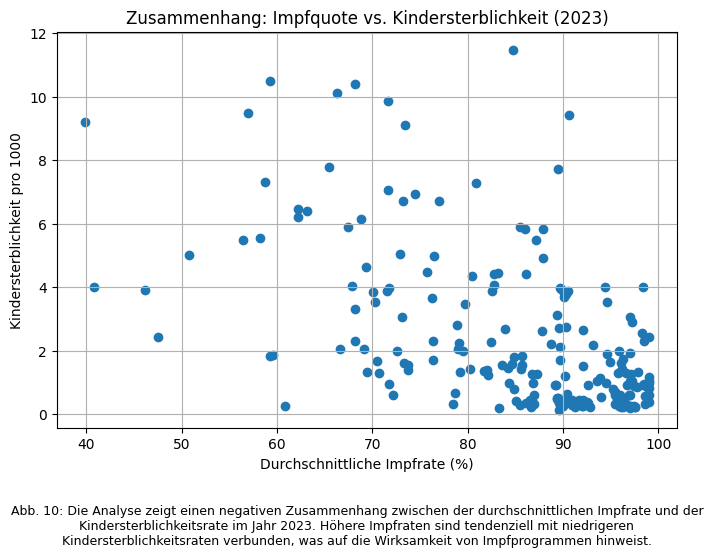

In [297]:
df_corr = rename_df[rename_df["Year"] == 2023]

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df_corr["Impfungen Durchschnitt"], df_corr["Child Mortality Rate"])

ax.set_xlabel("Durchschnittliche Impfrate (%)")
ax.set_ylabel("Kindersterblichkeit pro 1000")
ax.set_title("Zusammenhang: Impfquote vs. Kindersterblichkeit (2023)")
ax.grid(True)

caption = (
    "Abb. 10: Die Analyse zeigt einen negativen Zusammenhang zwischen der durchschnittlichen Impfrate und der Kindersterblichkeitsrate im Jahr 2023. Höhere Impfraten sind tendenziell mit niedrigeren Kindersterblichkeitsraten verbunden, was auf die Wirksamkeit von Impfprogrammen hinweist."
)

fig.subplots_adjust(bottom=0.22)
fig.text(0.5, 0.02, textwrap.fill(caption, 110),
         ha="center", va="bottom", fontsize=9)

plt.show()


In [273]:
# Pearson-Korrelation zwischen Impfquote und Kindersterblichkeit
korrelation = df_corr["Impfungen Durchschnitt"].corr(df_corr["Child Mortality Rate"])
print(f"Korrelationskoeffizient (2023): {korrelation:.3f}")


Korrelationskoeffizient (2023): -0.543


| Wert          | Bedeutung                           |
| ------------- | ----------------------------------- |
| -0.8 bis -1.0 | sehr starker negativer Zusammenhang |
| -0.5 bis -0.8 | deutlicher negativer Zusammenhang   |
| -0.3 bis -0.5 | schwacher negativer Zusammenhang    |
| 0 bis -0.3    | kaum Zusammenhang                   |

Negativer Zusammenhang bedeutet in unserem Beispiel, dass, wenn die Impfrate steigt, die Kindersterblichkeit sinkt.
Ein positiver Zusammenhang würde bedeuten, dass beide Werte steigen respektive sinken würden.

In [274]:
def berechne_korrelationsverlauf(df, impf_spalte, sterbe_spalte, min_laender=10):
    jahre = []
    korrelationen = []

    for jahr in sorted(df["Year"].unique()):
        df_jahr = df[df["Year"] == jahr]
        if len(df_jahr) >= min_laender:
            r = df_jahr[impf_spalte].corr(df_jahr[sterbe_spalte])
            jahre.append(jahr)
            korrelationen.append(r)

    return pd.DataFrame({"Jahr": jahre, "Korrelation": korrelationen})


In [275]:
df_korr = berechne_korrelationsverlauf(rename_df, "Impfungen Durchschnitt", "Child Mortality Rate")


In [276]:
print("Statistische Auswertung der Korrelation Impfquote vs. Kindersterblichkeit:\n")

print(f"Anzahl Jahre: {len(df_korr)}")
print(f"Stärkste negative Korrelation: {df_korr['Korrelation'].min():.3f} im Jahr {df_korr.loc[df_korr['Korrelation'].idxmin(), 'Jahr']}")
print(f"Schwächste (nahe 0) Korrelation: {df_korr['Korrelation'].max():.3f} im Jahr {df_korr.loc[df_korr['Korrelation'].idxmax(), 'Jahr']}")
print(f"Durchschnittliche Korrelation: {df_korr['Korrelation'].mean():.3f}")
print(f"Standardabweichung: {df_korr['Korrelation'].std():.3f}")


Statistische Auswertung der Korrelation Impfquote vs. Kindersterblichkeit:

Anzahl Jahre: 44
Stärkste negative Korrelation: -0.765 im Jahr 2001
Schwächste (nahe 0) Korrelation: -0.543 im Jahr 2023
Durchschnittliche Korrelation: -0.670
Standardabweichung: 0.058


### 3.7 Vergleich Impfungen Total

Die Differenz zwischen den durchschnittlichen Impfquoten zwischen den Jahren 2000 und 2023 von DiTePer (M = 55.96, t = 21.00), Polio (M = 52.67, t = 25.56), Masern (M = 50.71, t = 25.55) zwischen der Schweiz und Tschad war signifikant (p < 0.001) (Tab. 16, Abb. 11b). Hinter der Differenz stehen verschiedene Ursachen. Tschad ist geprägt von Epidemien und Impfkampagnen, welche als Schwankungen in der Impfquote sichtbar werden. Die Schweiz ist geprägt von relativ konstanten und hohen Impfquoten. Aufgrund der guten Gesundheitsversorgung ist es für einzelne Personen auch möglich, auf gewisse Impfungen, wie z.B. der Masernimpfung, zu verzichten und eventuell von einer (teilweisen) Herdenimmunität zu profitieren. Auch in dieser Auswertung ist die weltweite verbesserte Gesundheitsversorgung in einer deutlichen Reduktion der Differenzen (P(χ2) = 0.89) innerhalb dieser 23 Jahren sichtbar (Abb. 11a).  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
https://www.scribbr.ch/statistik-ch/t-test/
https://www.msf.ch/de/neueste-beitraege/artikel/im-mai-2018-brachen-im-tschad-die-masern-aus-die-epidemie-konnte-bislang
https://www.unicef.ch/de/aktuell/news/2025-04-28/weltimpfwoche-alarmierende-rueckschritte-bei-impfpraeventablen-krankheiten
https://reisemedizin.uzh.ch/de/blog/masern


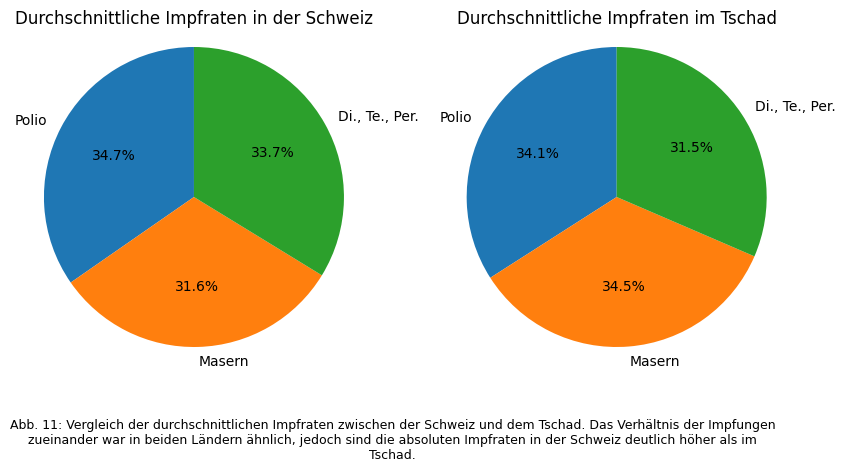

<Figure size 640x480 with 0 Axes>

In [ ]:
country_schweiz = "Switzerland"
country_chad = "Chad"

label_schweiz = "Schweiz"
label_chad = "Tschad"

VACC_COLS = {
    "Polio": "Polio Vaccine Coverage",
    "Masern": "Measles Vaccine Coverage",
    "Di., Te., Per.": "Di te per Vaccine Coverage",
}

def get_means_for_country(country: str) -> pd.Series:
    s = rename_df.loc[rename_df["Entity"] == country, list(VACC_COLS.values())].mean()
    s = s.rename({v: k for k, v in VACC_COLS.items()})
    s = s.fillna(0)
    if s.sum() == 0:
        print(f"Warnung: Keine Werte für {country} in den gewählten Impfspalten.")
    return s

werte1 = get_means_for_country(country_schweiz)
werte2 = get_means_for_country(country_chad)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].pie(
    werte1,
    labels=werte1.index,
    autopct="%1.1f%%",
    startangle=90
)
axes[0].set_title(f"Durchschnittliche Impfraten in der {label_schweiz}")
axes[0].axis("equal")

axes[1].pie(
    werte2,
    labels=werte2.index,
    autopct="%1.1f%%",
    startangle=90
)
axes[1].set_title(f"Durchschnittliche Impfraten im {label_chad}")
axes[1].axis("equal")


caption = (
    "Abb. 11: Vergleich der durchschnittlichen Impfraten zwischen der Schweiz und dem Tschad. Das Verhältnis der Impfungen zueinander war in beiden Ländern ähnlich, jedoch sind die absoluten Impfraten in der Schweiz deutlich höher als im Tschad."
)

fig.subplots_adjust(bottom=0.22)
fig.text(
    0.5, 0.02,
    textwrap.fill(caption, 120),
    ha="center", va="bottom",
    fontsize=9
)



plt.show()


plt.tight_layout()


In [278]:
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
print("Chi-Quadrat Test zwischen", label_schweiz, "und", label_chad)
obs = np.array([[werte1], [werte2]])
res = chi2_contingency(obs)
res.statistic
res.pvalue
res.dof
res.expected_freq

Chi-Quadrat Test zwischen Schweiz und Tschad


array([[[95.099027  , 89.13276614, 91.39978581]],

       [[32.75228879, 30.69749702, 31.47826297]]])

Tab. 16: p-Wert-Modus: t-Verteilung (mpmath)


,Impfstoff,n (gemeinsame Jahre),Mean(Schweiz-Tschad),CI95_low,CI95_high,t,df,p
2,"Di., Te., Per.",24,55.958333,50.444988,61.471679,20.996079,23,2.220446e-16
1,Masern,24,50.708333,46.602091,54.814575,25.546029,23,0.000000e+00
0,Polio,24,52.666667,48.404444,56.928889,25.561618,23,0.000000e+00


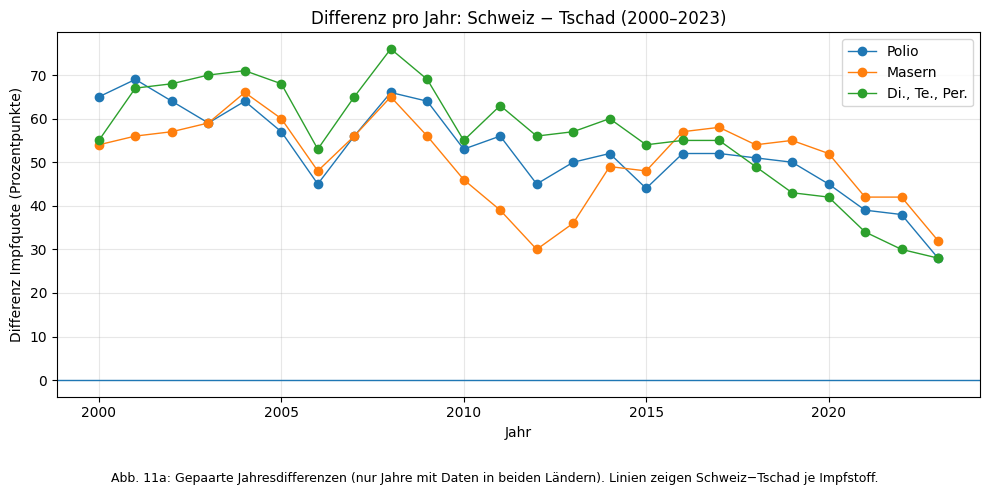

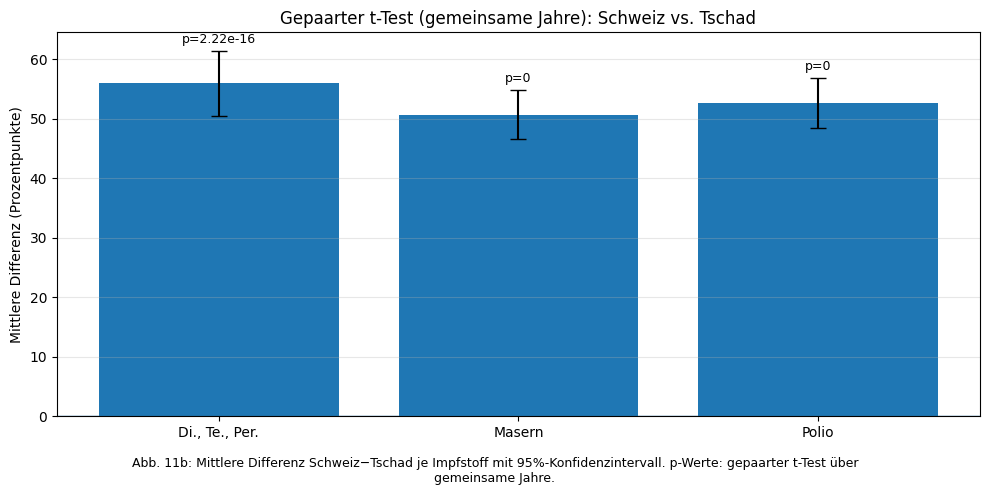

In [ ]:
country_schweiz = "Switzerland"
country_chad = "Chad"
label_schweiz = "Schweiz"
label_chad = "Tschad"

VACC_COLS = {
    "Polio": "Polio Vaccine Coverage",
    "Masern": "Measles Vaccine Coverage",
    "Di., Te., Per.": "Di te per Vaccine Coverage",
}

YEAR_FROM = 2000
YEAR_TO = 2023

try:
    import mpmath as mp

    def t_cdf(t, df):
        x = df / (df + t*t)
        ib = mp.betainc(df/2, 0.5, 0, x, regularized=True)
        return 1 - 0.5*ib if t >= 0 else 0.5*ib

    def t_ppf(p, df):
        lo, hi = -50.0, 50.0
        for _ in range(120):
            mid = (lo + hi) / 2
            if t_cdf(mid, df) < p:
                lo = mid
            else:
                hi = mid
        return (lo + hi) / 2

    def p_value_from_t(t, df):
        t = abs(t)
        return float(2 * (1 - t_cdf(t, df)))

    MODE = "t-Verteilung (mpmath)"
except Exception:
    def norm_cdf(z):
        return 0.5 * (1.0 + math.erf(z / math.sqrt(2)))

    def p_value_from_t(t, df):
        return 2 * (1 - norm_cdf(abs(t)))

    def t_ppf(p, df):
        return 1.96 if abs(p - 0.975) < 1e-9 else 0.0

    MODE = "Normalapprox (ohne mpmath)"


def paired_ttest(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    d = x - y
    d = d[~np.isnan(d)]
    n = len(d)
    if n < 2:
        return np.nan, np.nan, np.nan, n, np.nan, np.nan, np.nan
    md = float(d.mean())
    sd = float(d.std(ddof=1))
    se = sd / math.sqrt(n)
    t = md / se
    df = n - 1
    p = p_value_from_t(t, df)

    tcrit = float(t_ppf(0.975, df))  # 95% CI
    ci_low = md - tcrit * se
    ci_high = md + tcrit * se
    return t, df, p, n, md, ci_low, ci_high


cols_needed = ["Entity", "Year"] + list(VACC_COLS.values())
df = rename_df.loc[rename_df["Entity"].isin([country_schweiz, country_chad]), cols_needed].copy()

df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df = df[(df["Year"] >= YEAR_FROM) & (df["Year"] <= YEAR_TO)]

for c in VACC_COLS.values():
    df[c] = pd.to_numeric(df[c], errors="coerce")

df = df.groupby(["Entity", "Year"], as_index=False).mean(numeric_only=True)

rows = []
paired_series = {}

for vacc_label, col in VACC_COLS.items():
    wide = df.pivot(index="Year", columns="Entity", values=col)

    if country_schweiz not in wide.columns or country_chad not in wide.columns:
        continue

    pair = wide[[country_schweiz, country_chad]].dropna()
    x = pair[country_schweiz].to_numpy()
    y = pair[country_chad].to_numpy()

    t, dfree, p, n, md, ci_low, ci_high = paired_ttest(x, y)

    rows.append({
        "Impfstoff": vacc_label,
        "n (gemeinsame Jahre)": n,
        f"Mean({label_schweiz}-{label_chad})": md,
        "CI95_low": ci_low,
        "CI95_high": ci_high,
        "t": t,
        "df": dfree,
        "p": p
    })

    paired_series[vacc_label] = (pair.index.to_numpy(), (x - y))

res = pd.DataFrame(rows).sort_values("Impfstoff")
print("Tab. 16: p-Wert-Modus:", MODE)
display(res)

# Plot 1: Differenzen pro Jahr (CH - TD)
fig, ax = plt.subplots(figsize=(10, 5))
for vacc_label, (years, diffs) in paired_series.items():
    ax.plot(years, diffs, marker="o", linewidth=1, label=vacc_label)

ax.axhline(0, linewidth=1)
ax.set_title(f"Differenz pro Jahr: {label_schweiz} − {label_chad} ({YEAR_FROM}–{YEAR_TO})")
ax.set_xlabel("Jahr")
ax.set_ylabel("Differenz Impfquote (Prozentpunkte)")
ax.grid(True, alpha=0.3)
ax.legend()

caption = (
    f"Abb. 11a: Gepaarte Jahresdifferenzen (nur Jahre mit Daten in beiden Ländern). "
    f"Linien zeigen {label_schweiz}−{label_chad} je Impfstoff."
)
fig.subplots_adjust(bottom=0.22)
fig.text(0.5, 0.02, textwrap.fill(caption, 120), ha="center", va="bottom", fontsize=9)

plt.tight_layout(rect=[0, 0.08, 1, 1])
plt.show()

# Plot 2: Mittelwert-Differenz + 95%-CI und p-Wert
fig, ax = plt.subplots(figsize=(10, 5))
labels = res["Impfstoff"].tolist()
xpos = np.arange(len(labels))

means = res[f"Mean({label_schweiz}-{label_chad})"].to_numpy()
lo = res["CI95_low"].to_numpy()
hi = res["CI95_high"].to_numpy()
yerr = np.vstack([means - lo, hi - means])

ax.bar(xpos, means, yerr=yerr, capsize=6)
ax.axhline(0, linewidth=1)
ax.set_xticks(xpos)
ax.set_xticklabels(labels)
ax.set_title(f"Gepaarter t-Test (gemeinsame Jahre): {label_schweiz} vs. {label_chad}")
ax.set_ylabel("Mittlere Differenz (Prozentpunkte)")
ax.grid(True, axis="y", alpha=0.3)

for i, p in enumerate(res["p"].to_numpy()):
    top = hi[i]
    ax.text(i, top + 0.8, f"p={p:.3g}", ha="center", va="bottom", fontsize=9)

caption = (
    f"Abb. 11b: Mittlere Differenz {label_schweiz}−{label_chad} je Impfstoff "
    f"mit 95%-Konfidenzintervall. p-Werte: gepaarter t-Test über gemeinsame Jahre."
)
fig.subplots_adjust(bottom=0.22)
fig.text(0.5, 0.02, textwrap.fill(caption, 120), ha="center", va="bottom", fontsize=9)

plt.tight_layout(rect=[0, 0.08, 1, 1])
plt.show()


### 3.8 Sinkende Impfrate in Monaco

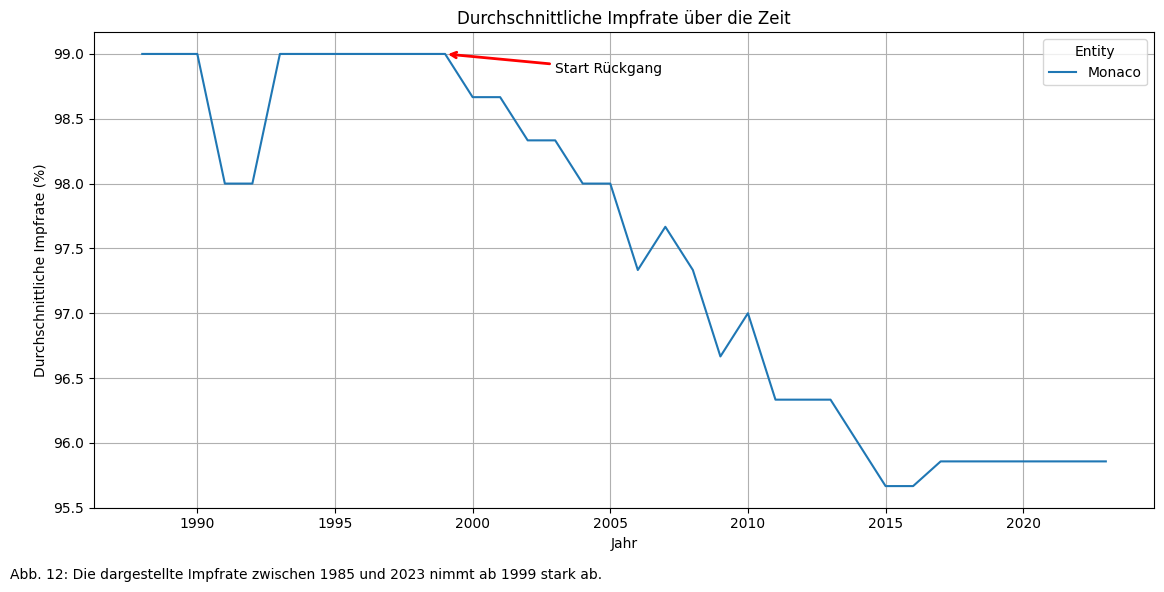

In [ ]:
df_avg = rename_df[rename_df['Entity'].isin(monaco)]
plt.figure(figsize=(12,6))
sns.lineplot(data=df_avg, x="Year", y="Impfungen Durchschnitt", hue="Entity")
plt.title("Durchschnittliche Impfrate über die Zeit")
plt.xlabel("Jahr")
plt.ylabel("Durchschnittliche Impfrate (%)")
plt.grid(True)

plt.annotate(
    "Start Rückgang",
    xy=(1999, 99),
    xytext=(2003, 98.85),
    arrowprops=dict(
        arrowstyle="->",
        color="red",
        linewidth=2,
    ),
)
plt.text(0.2, -0.15, "Abb. 12: Die dargestellte Impfrate zwischen 1985 und 2023 nimmt ab 1999 stark ab.", ha='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()



## 4. Analyse

### 4.1 Vorgehen

Für die Analyse wurden zwei Länder-Zeitreihen auf Jahresebene zusammengeführt (Join über Entity und Year): (1) Impfquoten mehrerer Kinderimpfungen und (2) Kindersterblichkeit (Under-5-Mortality). Als Datengrundlage dienen die von Our World in Data bereitgestellten Reihen zur Impfquote sowie zur Kindersterblichkeit (Schätzungen der UN-IGME, aufbereitet durch OWID).
Anschliessend wurden drei Auswertungsschritte durchgeführt, die sich an den Diagrammen in Punkt 4 orientieren:
1.	Zeitreihenvergleich der Polio-Impfquote für drei Länder (Liniendiagramm). Zeitreihen werden als Linien dargestellt, weil sie Trends/Brüche über Jahre am klarsten sichtbar machen.
2.	Querschnitt 2023: Zusammenhang zwischen durchschnittlicher Impfquote (über mehrere Impfungen) und Kindersterblichkeit (Scatterplot). Scatterplots eignen sich besonders zur Sichtbarmachung von Zusammenhängen und Ausreissern. 
3.	Korrelation über die Zeit: Für jedes Jahr wurde die Korrelation zwischen durchschnittlicher Impfquote und Kindersterblichkeit berechnet und als Linie visualisiert, um die Stabilität des Zusammenhangs über die Jahre zu beurteilen. 


### 4.2 Beobachtungen
**Beobachtungen zur Impfquote über die Zeit**

Die durchschnittlichen Impfquoten sind in den meisten untersuchten Ländern seit den 1990er-Jahren deutlich gestiegen.

- In den Niederlanden, als Beispiel aus unseren Analysen, lagen die Quoten bereits früh über 90% und blieben über die Jahre konstant hoch.
- Chad zeigt dagegen einen kontinuierlichen Anstieg.
- Australien, als Beispiel für ein Land mit einer durchschnittlichen Impfquote, stiegen und schwankten die Werte bis um das Jahr 2000. Seit dann erreicht die Impfquote bei den etablierten Impfungen über 90%.

Diese Entwicklung deutet auf erfolgreiche Impfprogramme in vielen Ländern hin, insbesondere in Ländern mit ursprünglich niedriger Quote.

**Beobachtungen zum Zusammenhang zwischen Impfquote und Kindersterblichkeit**

Die Scatterplot-Analyse für das Jahr 2023 zeigt einen klaren negativen Zusammenhang:

- Länder mit hohen Impfraten haben fast durchgehend eine geringe Kindersterblichkeitsrate.
- Umgekehrt weisen Länder mit niedrigen Impfraten deutlich höhere Sterblichkeitsraten auf.
- Die berechnete Pearson-Korrelation von -0.543 bestätigt diesen starken negativen Zusammenhang.

Dies legt nahe, dass hohe Durchimpfungsraten ein entscheidender Faktor für die Reduktion der Kindersterblichkeit sind.

**Beobachtungen zur Entwicklung des Zusammenhangs über die Jahre**

Die Korrelation zwischen Impfquote und Kindersterblichkeit wird zwischen 1990 und 2023 zunehmend negativer, was bedeutet:

- Der Zusammenhang zwischen diesen beiden Faktoren wird im Zeitverlauf stärker.
- Das könnte darauf hindeuten, dass Impfungen mit der Zeit eine immer grössere Rolle in der Senkung der Kindersterblichkeit spielen.
- Nach 2015 flacht die Korrelation etwas ab, was möglicherweise darauf zurückzuführen ist, dass andere Gesundheitsfaktoren (z.B. Hygiene, medizinische Versorgung) ebenfalls entscheidender werden.

Die Entwicklung zeigt insgesamt, wie bedeutend Impfprogramme für die globale Gesundheit sind.
https://www.unicef.de/informieren/aktuelles/blog/-/elf-dinge-ueber-impfungen-zur-weltimpfwoche/275230


### 4.3 Interpretation

Die Ergebnisse sind konsistent mit dem etablierten Befund, dass Impfungen einen wichtigen Beitrag zur Reduktion vermeidbarer Kinderkrankheiten leisten und damit Kindersterblichkeit senken können. WHO und UNICEF beschreiben Impfprogramme als zentrale, lebensrettende Massnahme und beziffern den globalen Nutzen in Millionen verhinderter Todesfälle pro Jahr. 
https://www.who.int/health-topics/vaccines-and-immunization#tab=tab_1

Wichtig ist jedoch: Korrelation ist kein Kausalitätsnachweis. Der negative Zusammenhang kann durch Drittvariablen mitgeprägt sein (z. B. Einkommen, allgemeiner Gesundheitszugang, Wasser/Sanitärversorgung, Bildung, Konflikte, Datenqualität). Daher sollte die Analyse als Hinweis auf einen Zusammenhang verstanden werden, nicht als „Beweis“, dass Impfungen allein die Unterschiede erklären. 
https://journals.lww.com/anesthesia-analgesia/fulltext/2018/05000/correlation_coefficients__appropriate_use_and.50.aspx

Die Länderunterschiede im Zeitreihenplot lassen sich plausibel über ungleiche Systembedingungen interpretieren: WHO verweist darauf, dass Impflücken häufig durch Zugangsprobleme, fragile Systeme und unzureichende Abdeckung einzelner Bevölkerungsgruppen entstehen.
https://www.who.int/news-room/fact-sheets/detail/immunization-coverage 


### 4.4 Berechnungen

•	Durchschnittliche Impfquote (pro Land/Jahr): Mittelwert über alle verfügbaren Impf-Coverage-Spalten (in %). Dadurch entsteht ein robusterer Gesamtindikator als die Betrachtung nur einer Impfung.

In [298]:
impf_cols = [col for col in rename_df.columns if "Coverage" in col]

rename_df["Impfungen Durchschnitt"] = rename_df[impf_cols].mean(axis=1)


•	Korrelation: Berechnung der Pearson-Korrelation zwischen durchschnittlicher Impfquote und Kindersterblichkeit (2023 sowie pro Jahr). Die Interpretation von Korrelationen sollte kontextabhängig erfolgen; als grobe Orientierung werden Effektgrössen (z. B. r≈0.5) häufig als eher „stärker“ diskutiert.
https://journals.lww.com/anesthesia-analgesia/fulltext/2018/05000/correlation_coefficients__appropriate_use_and.50.aspx


In [282]:
df_2023 = rename_df[rename_df["Year"] == 2023]
korrelation = df_2023["Impfungen Durchschnitt"].corr(df_2023["Child Mortality Rate"])
print(f"Korrelation 2023: {korrelation:.3f}")


Korrelation 2023: -0.543


In [283]:
jahre = []
korrelationen = []

for jahr in sorted(rename_df["Year"].unique()):
    df_jahr = rename_df[rename_df["Year"] == jahr]
    if len(df_jahr) > 10:
        corr = df_jahr["Impfungen Durchschnitt"].corr(df_jahr["Child Mortality Rate"])
        jahre.append(jahr)
        korrelationen.append(corr)

df_korr = pd.DataFrame({"Jahr": jahre, "Korrelation": korrelationen})


In [284]:
laender = ['Netherlands', 'Chad', 'Australia']
df_plot = rename_df[rename_df['Entity'].isin(laender)]


### 4.5 Visualisierung

**Entwicklung der Polio-Impfquote über die Zeit (Ländervergleich)**

Die Grafik zeigt die Entwicklung der Polio-Impfquoten in drei sehr unterschiedlichen Ländern:

- **Niederlande**: konstant hohe Impfquote über 90 % – bereits früh ein hoher medizinischer Standard.
- **Australien**: zeigt eine klare Steigerung seit den 1990er-Jahren – Hinweis auf erfolgreiche Impfprogramme.
- **Chad**: insgesamt niedrigere Impfquoten und weniger Fortschritt – es bestehen Herausforderungen beim Zugang zu Impfungen.

Diese Entwicklungen deuten auf globale Ungleichheiten hin, insbesondere im Gesundheitszugang und in der Umsetzung von Impfprogrammen.


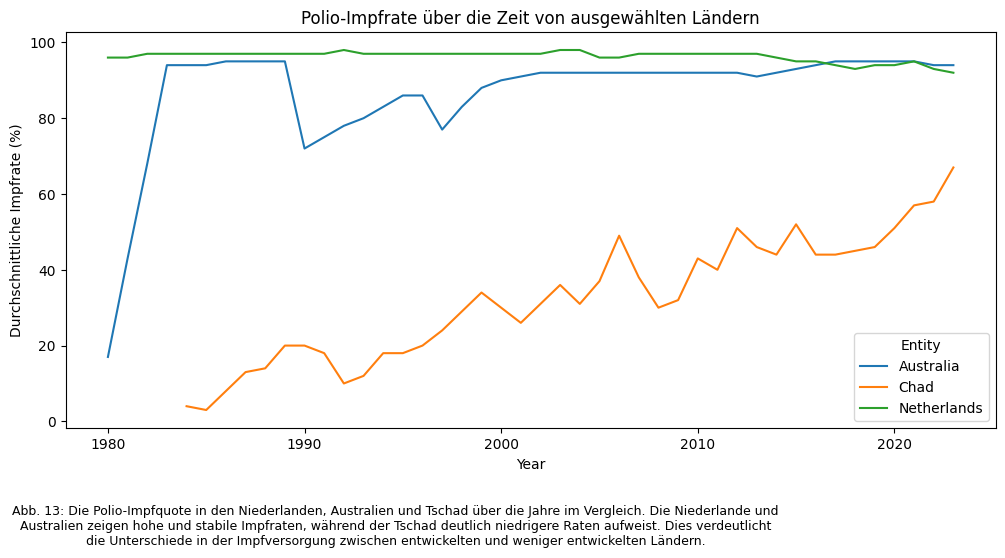

In [285]:
import textwrap
df_avg = rename_df[rename_df["Entity"].isin(laender)]
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_avg, x="Year", y="Polio Vaccine Coverage", hue="Entity", ax=ax)

ax.set_title("Polio-Impfrate über die Zeit von ausgewählten Ländern")
ax.set_ylabel("Durchschnittliche Impfrate (%)")

caption = "Abb. 13: Die Polio-Impfquote in den Niederlanden, Australien und Tschad über die Jahre im Vergleich. Die Niederlande und Australien zeigen hohe und stabile Impfraten, während der Tschad deutlich niedrigere Raten aufweist. Dies verdeutlicht die Unterschiede in der Impfversorgung zwischen entwickelten und weniger entwickelten Ländern." 

fig.subplots_adjust(bottom=0.22)

fig.text(
    0.4, 0.02,
    textwrap.fill(caption, 120),
    ha="center", va="bottom", fontsize=9
)

plt.show()


**Beobachtung zum Zusammenhang zwischen Impfquote und Kindersterblichkeit (2023)**

Der Scatterplot (Abb. 14) zeigt einen deutlich negativen Zusammenhang:

- Länder mit einer **hohen durchschnittlichen Impfquote** haben fast ausnahmslos eine **geringe Kindersterblichkeit**.
- Länder mit niedriger Impfquote erreichen deutlich **höhere Sterblichkeitsraten pro 1000 Geburten**.
- Die Pearson-Korrelation beträgt –0.543 – ein **moderater negativer Zusammenhang**.

Dies legt nahe, dass Impfraten ein bedeutender Faktor für das Überleben von Kleinkindern sind, insbesondere in Ländern mit begrenzter medizinischer Versorgung.


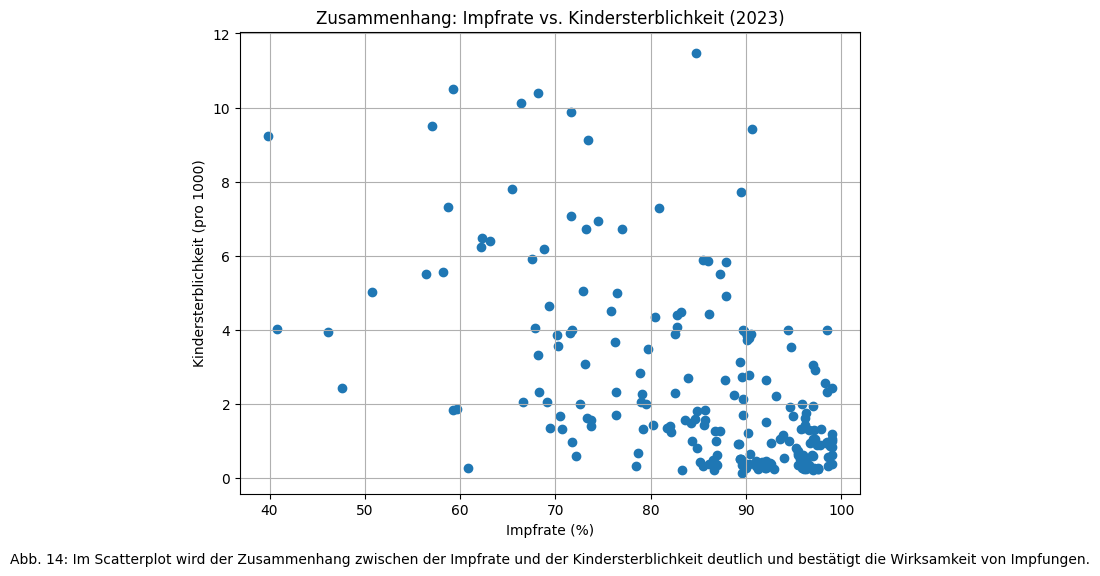

In [286]:
plt.figure(figsize=(8,6))
plt.scatter(df_2023["Impfungen Durchschnitt"], df_2023["Child Mortality Rate"])
plt.title("Zusammenhang: Impfrate vs. Kindersterblichkeit (2023)")
plt.xlabel("Impfrate (%)")
plt.ylabel("Kindersterblichkeit (pro 1000)")
plt.grid(True)
plt.text(0.5, -0.15, "Abb. 14: Im Scatterplot wird der Zusammenhang zwischen der Impfrate und der Kindersterblichkeit deutlich und bestätigt die Wirksamkeit von Impfungen.", ha='center', transform=plt.gca().transAxes)
plt.show()


**Entwicklung der Korrelation zwischen Impfquote und Kindersterblichkeit**

Die Korrelationskurve (Abb. 15) zeigt, dass der **negative Zusammenhang zwischen Impfquote und Kindersterblichkeit** über die Jahre insgesamt **stärker geworden ist**:

- In den 1990er-Jahren war der Zusammenhang noch weniger deutlich.
- Ab ca. 2005 sinkt der Korrelationswert – das bedeutet: Länder mit besseren Impfraten konnten die Kindersterblichkeit stärker senken.
- Nach 2015 stabilisiert sich der Wert etwas – möglicherweise, weil in vielen Ländern weitere Gesundheitsfaktoren (z. B. Hygiene, Ernährung, medizinische Infrastruktur) ebenfalls eine große Rolle spielen.

Die Analyse unterstreicht, wie wichtig flächendeckende Impfprogramme für den Rückgang der globalen Kindersterblichkeit sind.https://interaktiv.tagesanzeiger.ch/2021/diese-krankheiten-wurden-durch-impfungen-eingedaemmt-oder-ganz-ausgerottet/


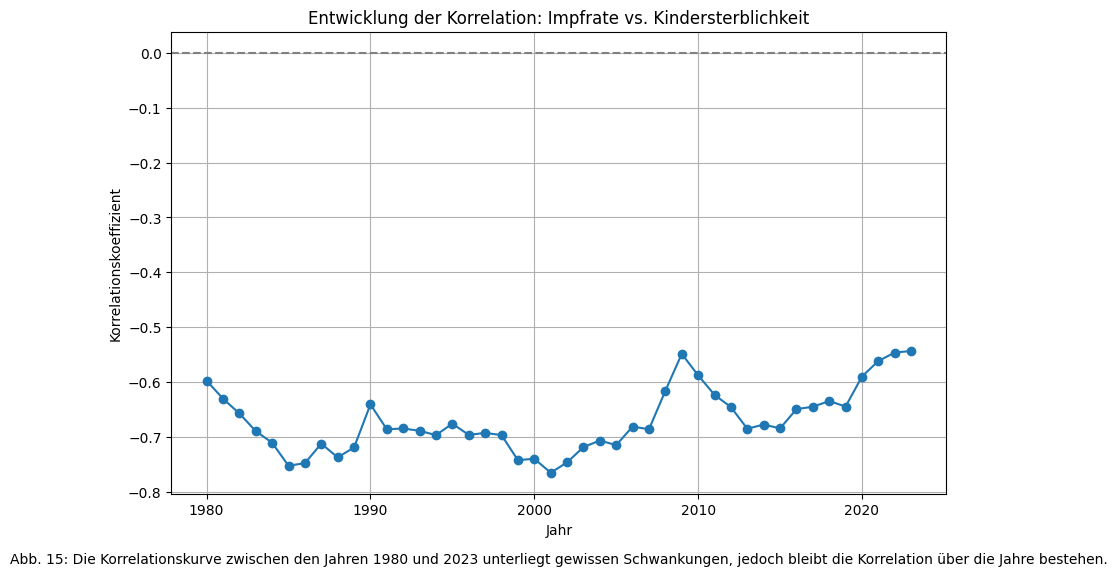

In [287]:
plt.figure(figsize=(10,6))
plt.plot(df_korr["Jahr"], df_korr["Korrelation"], marker='o')
plt.title("Entwicklung der Korrelation: Impfrate vs. Kindersterblichkeit")
plt.xlabel("Jahr")
plt.ylabel("Korrelationskoeffizient")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.text(0.5, -0.15, "Abb. 15: Die Korrelationskurve zwischen den Jahren 1980 und 2023 unterliegt gewissen Schwankungen, jedoch bleibt die Korrelation über die Jahre bestehen.", ha='center', transform=plt.gca().transAxes)
plt.show()


### 4.6 Limitationen und Datenqualität

Bei der Interpretation der Ergebnisse müssen einige Einschränkungen der Daten berücksichtigt werden:

- **Unvollständige Zeitreihen:** Nicht alle Länder haben für den gesamten Zeitraum von 1980–2024 durchgängig Daten. Gerade in den 1980er- und frühen 1990er-Jahren fehlen für verschiedene Länder einzelne Jahre vollständig. Trends, insbesondere zu Beginn des Beobachtungszeitraums, können deshalb verzerrt oder unsicher sein.

- **Unterschiedliche Datenabdeckung zwischen Ländern:** Für einige Länder (z.B. wohlhabende Staaten) liegen deutlich mehr und regelmäßigere Messpunkte vor als für andere (z.B. Länder mit niedrigem Einkommen oder politischer Instabilität). Das kann dazu führen, dass globale Durchschnitte und Korrelationen stärker von gut dokumentierten Ländern geprägt werden.

- **Aggregierte Landeswerte:** Die verwendeten Impfraten und Kindersterblichkeitsraten sind nationale Durchschnittswerte. Regionale Unterschiede innerhalb eines Landes (z.B. zwischen Stadt und Land oder zwischen verschiedenen Bevölkerungsgruppen) werden dadurch nicht sichtbar, obwohl sie in der Realität sehr groß sein können.

- **Weitere Einflussfaktoren:** Ein Zusammenhang zwischen hoher Impfquote und tiefer Kindersterblichkeit ist plausibel und wird in den Daten sichtbar. Gleichzeitig spielen aber weitere Faktoren eine Rolle, z.B. Zugang zu Gesundheitsversorgung, Ernährungssituation, sauberes Trinkwasser, wirtschaftliche Entwicklung und politische Stabilität. Diese Einflüsse werden in dieser Analyse nicht separat modelliert.

- **Mess- und Meldequalität:** Die Daten basieren auf internationalen Statistiken und Meldesystemen. In einigen Ländern kann es zu Untererfassung oder unsicheren Schätzungen kommen, insbesondere in Regionen mit schwacher Verwaltungs- oder Gesundheitsinfrastruktur.

Diese Limitationen bedeuten nicht, dass die Ergebnisse wertlos sind, aber sie zeigen, dass die gezeigten Trends und Korrelationen eher als grobe Orientierung und nicht als exakte „Wirkungsnachweise“ verstanden werden sollten.

-	Cleveland, W. S., & McGill, R. (1984). Graphical perception: Theory, experimentation, and application to the development of graphical methods. Journal of the American Statistical Association. Taylor & Francis Online
-	Our World in Data. Vaccination coverage (global-vaccination-coverage). Our World in Data
-	Our World in Data. Child mortality rate (under-5 mortality rate, UN IGME – processed by OWID). Our World in Data
-	Schober, P., Boer, C., & Schwarte, L. A. (2018). Correlation coefficients: Appropriate use and interpretation. Anesthesia & Analgesia. LWW Journals
-	UNICEF. Immunization: Life-saving and life-enhancing. UNICEF
-	UNICEF DATA. Under-five mortality. UNICEF DATA
-	World Health Organization (WHO). Immunization coverage (Fact sheet). Weltgesundheitsorganisation
-	World Health Organization (WHO). Vaccines and immunization (Health topic page). Weltgesundheitsorganisation
-	(Optional für Visualisierungstheorie) Tufte, E. R. The Visual Display of Quantitative Information (Book page). edwardtufte.com
-	(Optional für Effektgrössen-Einordnung) Brydges, C. R. (2019). Effect size guidelines… PMC

